Processing Variables For Modeling
==================

Libraries

In [66]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from sklearn.preprocessing import scale

# Visualization
import matplotlib.pyplot as plt; plt.style.use("ggplot")
import seaborn as sns
from matplotlib import rcParams
%matplotlib inline
# figure size
rcParams['figure.figsize'] = 15,10

pd.set_option('display.max_columns', None)

Read Data

In [2]:
loans = pd.read_csv("/media/juanan/DATA/loan_data_analysis/data/clean/loans.csv.gz")\
        .sample(200000, random_state = 4290)

In [3]:
loans.head()

,num_bc_sats,num_rev_tl_bal_gt_0,grade,avg_cur_bal,pub_rec_bankruptcies,num_rev_accts,tax_liens,funded_amnt_inv,delinq_2yrs,total_bal_ex_mort,pct_tl_nvr_dlq,disbursement_method,fico_range_low,verification_status,delinq_amnt,purpose,emp_title,zip_code,loan_amnt,installment,fico_range_high,annual_inc,term,int_rate,emp_length,revol_bal,application_type,num_bc_tl,num_sats,tot_hi_cred_lim,tot_coll_amt,initial_list_status,bc_open_to_buy,total_bc_limit,open_acc,revol_util,pub_rec,funded_amnt,num_il_tl,addr_state,num_accts_ever_120_pd,total_il_high_credit_limit,bc_util,percent_bc_gt_75,sub_grade,mort_acc,num_op_rev_tl,dti,home_ownership,loan_status
1627421,5.0,10.0,E,7832.0,0.0,22.0,0.0,22250.0,0.0,101817.0,91.9,Cash,670.0,Source Verified,0.0,credit_card,Human Resource Analyst,236xx,22250.0,588.13,674.0,53000.0,60 months,19.89,6 years,17476.0,Individual,11.0,14.0,113079.0,0.0,w,6094.0,19300.0,14.0,61.3,0.0,22250.0,15.0,VA,1.0,84579.0,68.4,60.0,E3,0.0,12.0,20.34,RENT,Current
1222587,1.0,2.0,C,8335.0,1.0,10.0,0.0,12000.0,0.0,75019.0,100.0,Cash,670.0,Not Verified,0.0,debt_consolidation,Teacher,076xx,12000.0,285.80,674.0,106000.0,60 months,15.05,10+ years,1571.0,Individual,3.0,9.0,101997.0,0.0,w,6304.0,7500.0,9.0,8.7,1.0,12000.0,13.0,NJ,0.0,83997.0,15.9,0.0,C4,2.0,5.0,14.16,MORTGAGE,Current
759829,10.0,6.0,B,12413.0,0.0,21.0,0.0,20000.0,0.0,46805.0,76.0,Cash,690.0,Verified,0.0,debt_consolidation,Supervisor- Control Center,800xx,20000.0,649.96,694.0,87000.0,36 months,10.49,10+ years,25241.0,Individual,12.0,16.0,270019.0,0.0,w,5310.0,53100.0,16.0,41.0,0.0,20000.0,5.0,CO,1.0,29047.0,45.0,10.0,B2,2.0,13.0,22.21,MORTGAGE,Fully Paid
125402,6.0,10.0,D,10798.0,0.0,18.0,0.0,35000.0,0.0,70845.0,100.0,Cash,685.0,Verified,0.0,debt_consolidation,Section Manager,187xx,35000.0,893.35,689.0,93660.0,60 months,18.24,10+ years,48500.0,Individual,7.0,15.0,196755.0,0.0,w,7168.0,42600.0,15.0,77.2,0.0,35000.0,10.0,PA,0.0,36606.0,83.2,83.3,D5,4.0,11.0,23.00,MORTGAGE,Charged Off
1041636,1.0,5.0,D,6130.0,0.0,5.0,0.0,6700.0,0.0,44692.0,100.0,Cash,685.0,Not Verified,0.0,debt_consolidation,E4,622xx,6700.0,242.19,689.0,45720.0,36 months,17.99,4 years,2274.0,Individual,1.0,7.0,50763.0,0.0,w,1500.0,1500.0,7.0,25.0,0.0,6700.0,7.0,IL,0.0,41563.0,69.0,0.0,D2,0.0,3.0,27.51,RENT,Current


In [4]:
loans.shape

(200000, 50)

### 01 - Processing Target: Loan Status

`loan_status` is the current status of the loan. This is the variable we want to predict in our machine learning models. For this variable, we are going to considerar the following labels:
- 0: loans that have already been paid.
- 1: default or charged off loans.

In [5]:
loans['loan_status'].value_counts()

Current                                                95709
Fully Paid                                             78905
Charged Off                                            20244
Late (31-120 days)                                      2845
In Grace Period                                         1247
Late (16-30 days)                                        717
Does not meet the credit policy. Status:Fully Paid       233
Does not meet the credit policy. Status:Charged Off       92
Default                                                    7
Name: loan_status, dtype: int64

In [6]:
loans = loans[(loans['loan_status'] == "Fully Paid") | \
              (loans['loan_status'] == "Charged Off")]

In [7]:
loans.shape

(99149, 50)

In [8]:
loan_status_dict = {'Fully Paid': 0,
                    'Charged Off': 1}

In [9]:
loans['loan_status'] = loans['loan_status'].map(lambda i: loan_status_dict[i])

In [10]:
loans['loan_status'].head(10)

759829     0
125402     1
542244     0
817252     0
382084     1
987223     0
1556066    1
157850     0
1339865    1
614892     0
Name: loan_status, dtype: int64

In [11]:
loans['loan_status'].dtypes

dtype('int64')

In [12]:
loans['loan_status'].describe()

count    99149.000000
mean         0.204178
std          0.403101
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: loan_status, dtype: float64

__Our prior value of un paid loans is about 20%__ We will keep this value in mind!

### 02 - Processing Numeric Variables

In [13]:
loans.dtypes

num_bc_sats                   float64
num_rev_tl_bal_gt_0           float64
grade                          object
avg_cur_bal                   float64
pub_rec_bankruptcies          float64
num_rev_accts                 float64
tax_liens                     float64
funded_amnt_inv               float64
delinq_2yrs                   float64
total_bal_ex_mort             float64
pct_tl_nvr_dlq                float64
disbursement_method            object
fico_range_low                float64
verification_status            object
delinq_amnt                   float64
purpose                        object
emp_title                      object
zip_code                       object
loan_amnt                     float64
installment                   float64
fico_range_high               float64
annual_inc                    float64
term                           object
int_rate                      float64
emp_length                     object
revol_bal                     float64
application_

In [14]:
numeric_variables = loans._get_numeric_data().columns

#### 02.1 - Filling NA's to the median for each feature

In [15]:
loans[numeric_variables].isnull().sum()

num_bc_sats                   6846
num_rev_tl_bal_gt_0           8248
avg_cur_bal                   8248
pub_rec_bankruptcies            83
num_rev_accts                 8249
tax_liens                        4
funded_amnt_inv                  0
delinq_2yrs                      0
total_bal_ex_mort             5794
pct_tl_nvr_dlq                8268
fico_range_low                   0
delinq_amnt                      0
loan_amnt                        0
installment                      0
fico_range_high                  0
annual_inc                       0
int_rate                         0
revol_bal                        0
num_bc_tl                     8248
num_sats                      6846
tot_hi_cred_lim               8248
tot_coll_amt                  8248
bc_open_to_buy                6724
total_bc_limit                5794
open_acc                         0
revol_util                      60
pub_rec                          0
funded_amnt                      0
num_il_tl           

In [16]:
loans[numeric_variables] = loans[numeric_variables].apply(lambda i: i.fillna(i.median()), axis = 1)

In [17]:
loans[numeric_variables].isnull().sum()

num_bc_sats                   0
num_rev_tl_bal_gt_0           0
avg_cur_bal                   0
pub_rec_bankruptcies          0
num_rev_accts                 0
tax_liens                     0
funded_amnt_inv               0
delinq_2yrs                   0
total_bal_ex_mort             0
pct_tl_nvr_dlq                0
fico_range_low                0
delinq_amnt                   0
loan_amnt                     0
installment                   0
fico_range_high               0
annual_inc                    0
int_rate                      0
revol_bal                     0
num_bc_tl                     0
num_sats                      0
tot_hi_cred_lim               0
tot_coll_amt                  0
bc_open_to_buy                0
total_bc_limit                0
open_acc                      0
revol_util                    0
pub_rec                       0
funded_amnt                   0
num_il_tl                     0
num_accts_ever_120_pd         0
total_il_high_credit_limit    0
bc_util 

Done!

#### 02.2 - Dealing with outliers

Let's check the distribution of the numeric features and their relationship with the target:

In [18]:
def numerical_variables_by_target_plot(numeric_variable):
    plt.figure(figsize=(16, 10))
    
    # Distrution of the variable
    plt.subplot(221)
    g=sns.kdeplot(loans[numeric_variable][(loans["loan_status"] == 0)], color="Red", shade = True)
    g=sns.kdeplot(loans[numeric_variable][(loans["loan_status"] == 1)], color="Blue", shade = True)
    
    g.set_xlabel(numeric_variable, fontsize=10)
    g.set_title("Distribution", fontsize=12)
    g.legend(["Fully Paid","Charged Off"])
    #plt.show()
    
    # boxplot
    plt.subplot(222)
    g = sns.boxplot(x = "loan_status", y = numeric_variable, 
                data=loans, notch = True) # notch for showing 95% confidence interval (median)

    g.set_ylabel(numeric_variable, fontsize=10)
    g.set_title("Loan Amount boxplot", fontsize=12)
    plt.show()

num_bc_sats


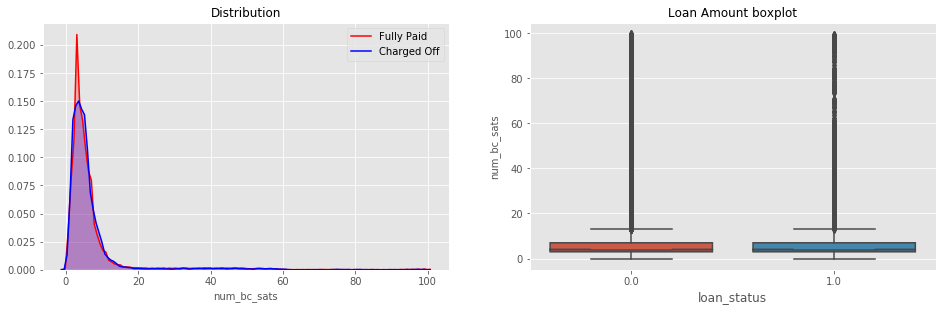

num_rev_tl_bal_gt_0


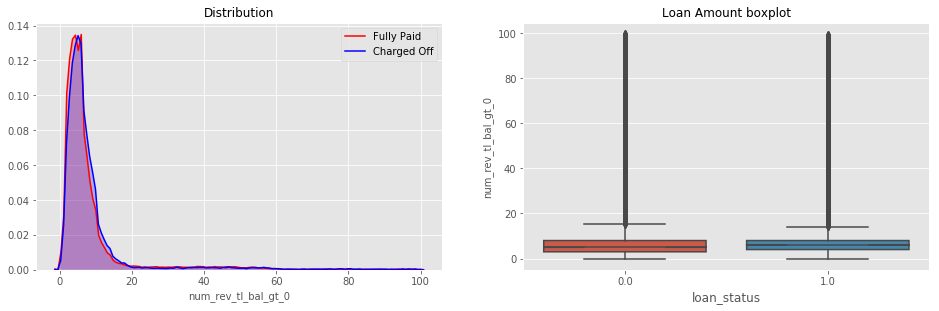

avg_cur_bal


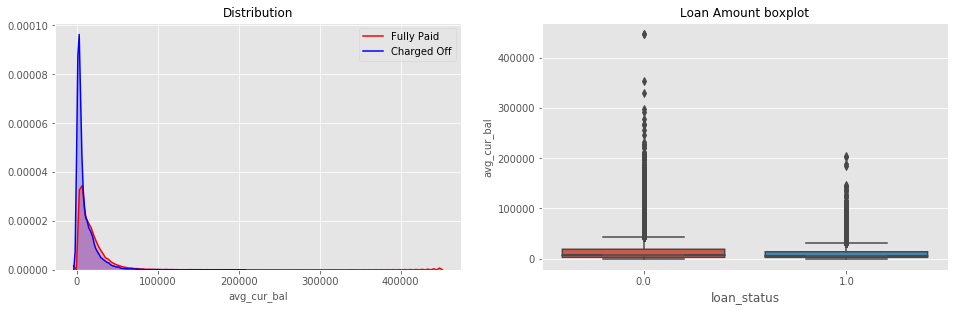

pub_rec_bankruptcies


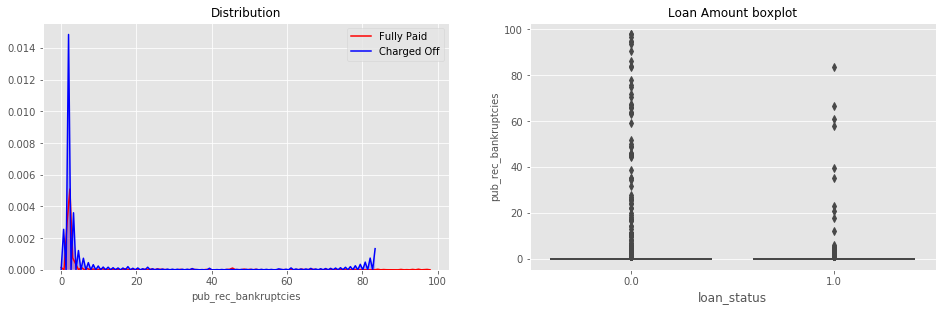

num_rev_accts


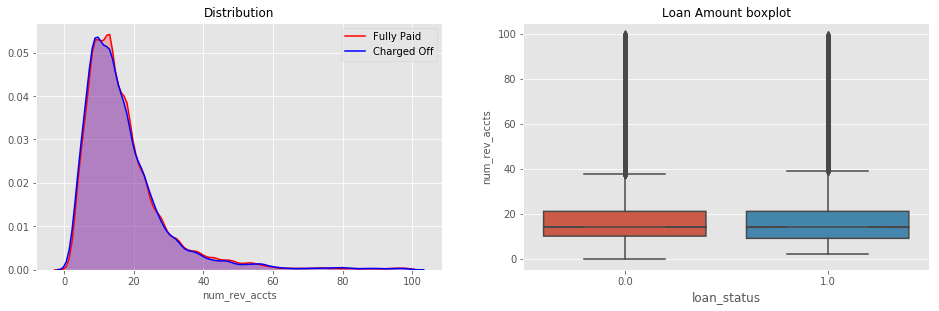

tax_liens


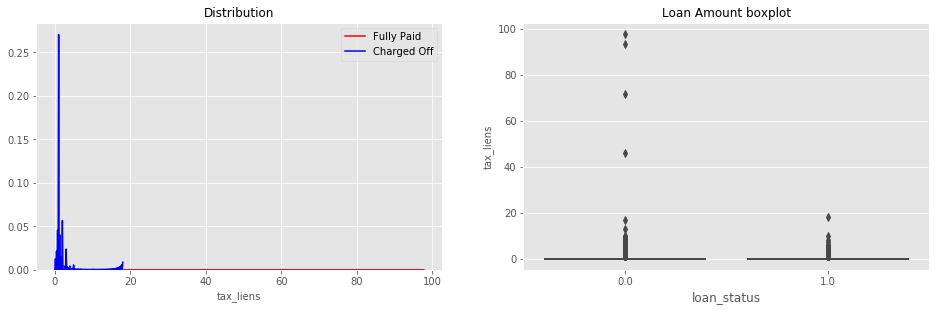

funded_amnt_inv


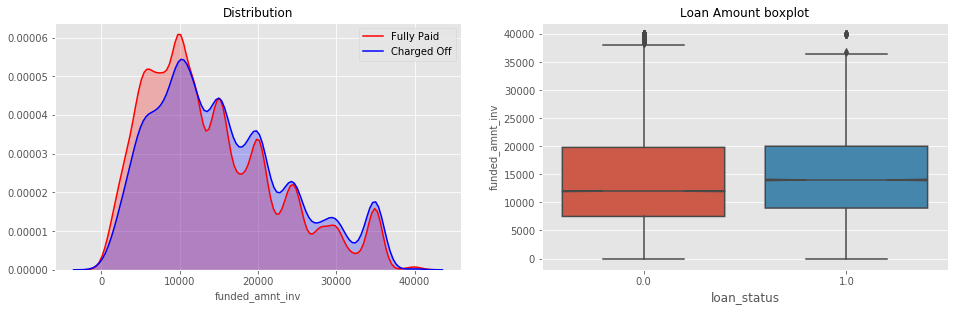

delinq_2yrs


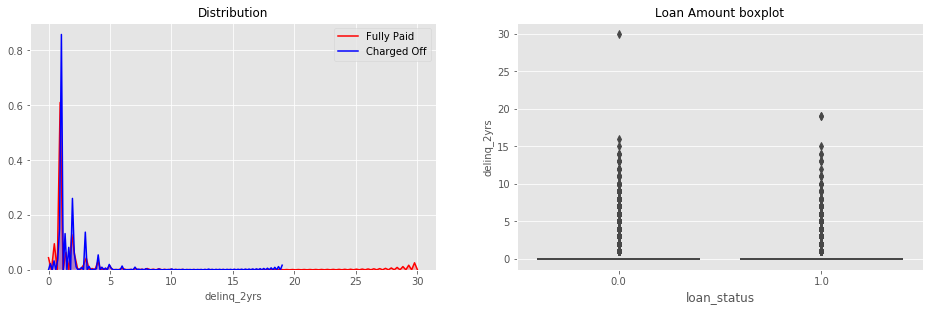

total_bal_ex_mort


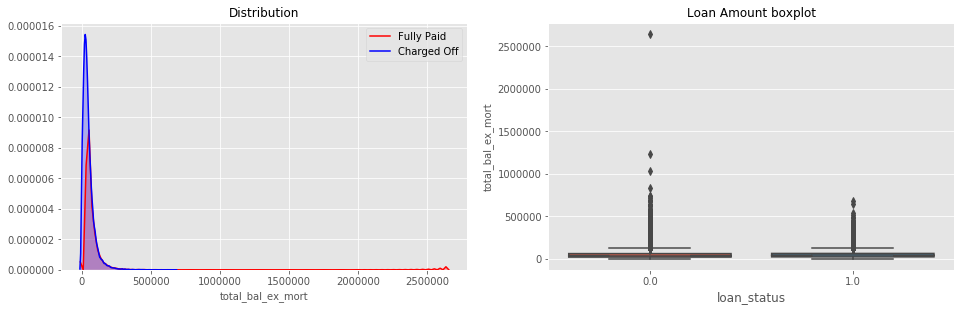

pct_tl_nvr_dlq


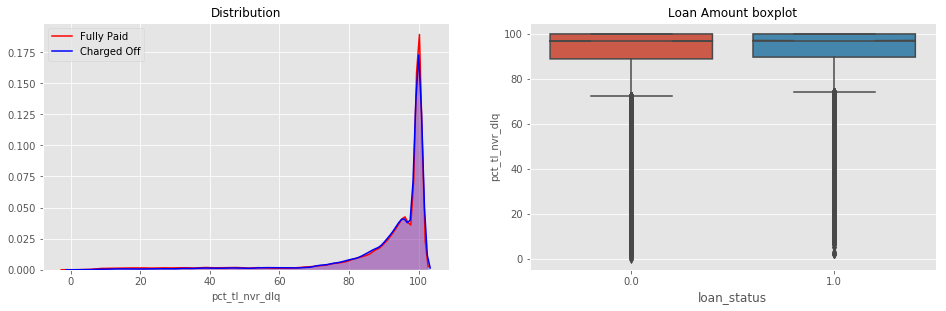

fico_range_low


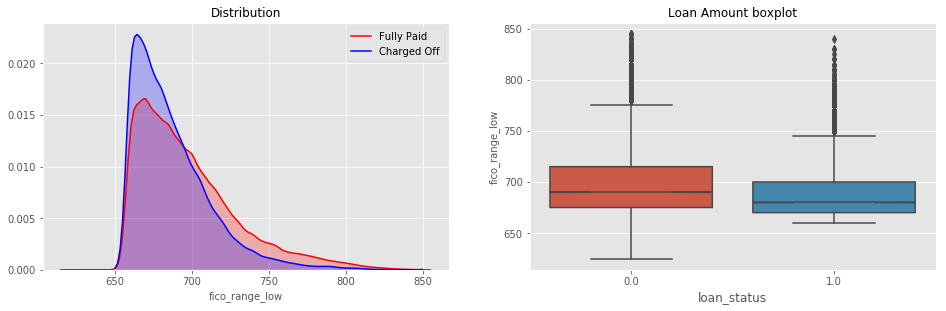

delinq_amnt


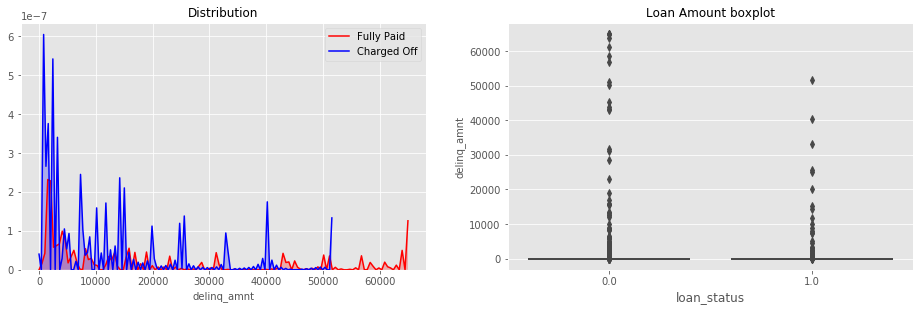

loan_amnt


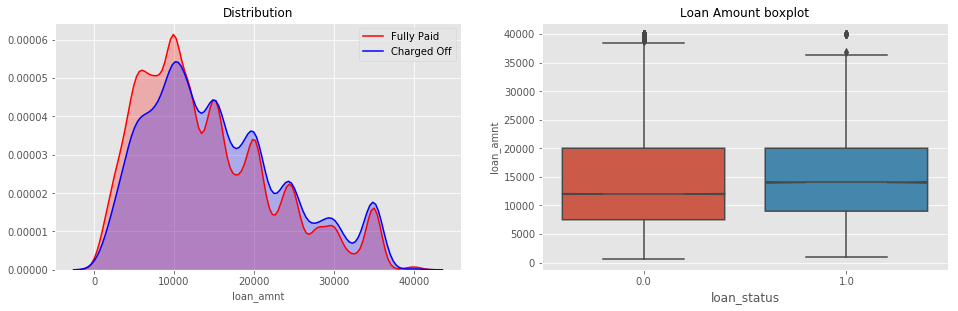

installment


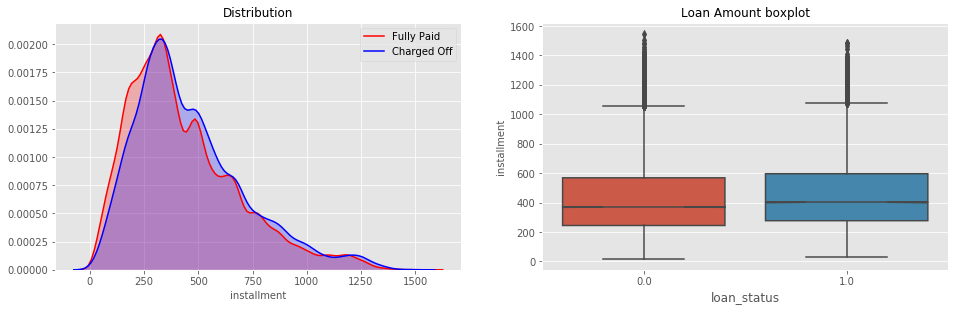

fico_range_high


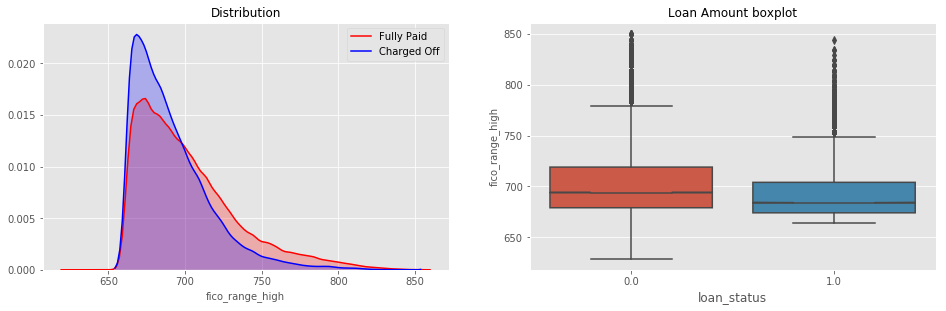

annual_inc


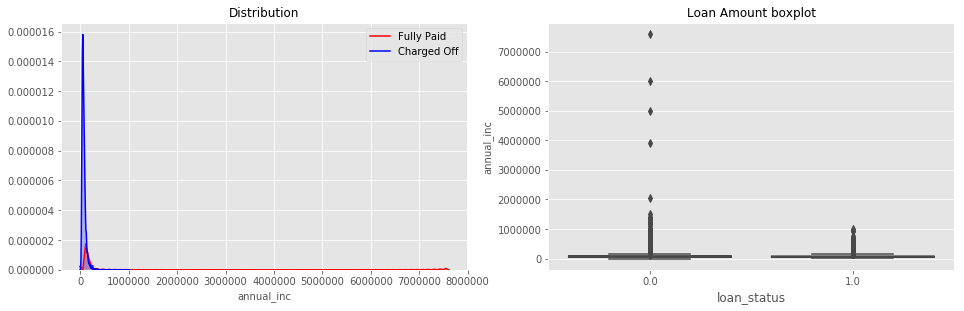

int_rate


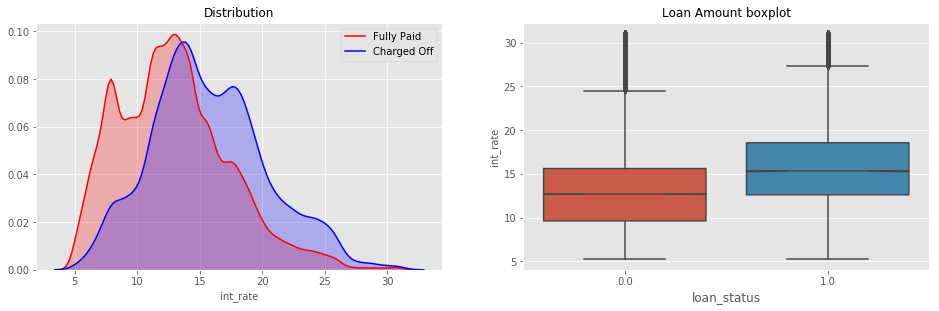

revol_bal


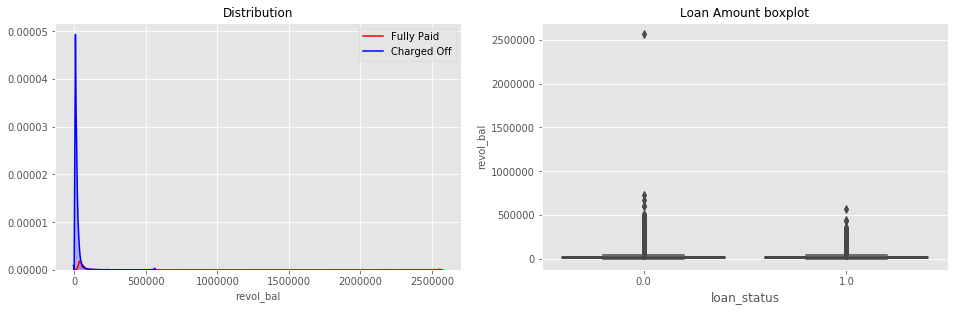

num_bc_tl


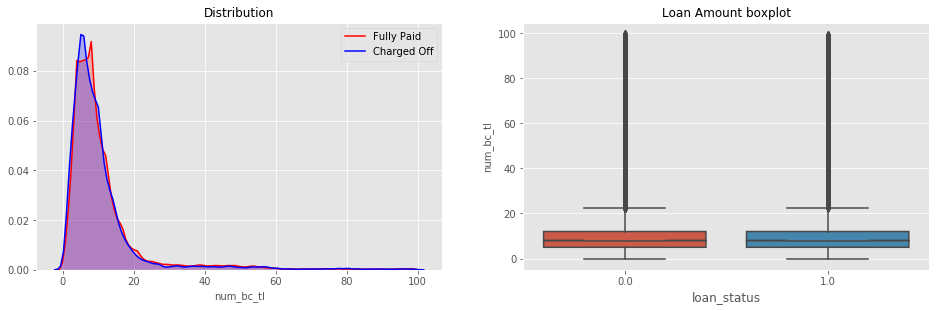

num_sats


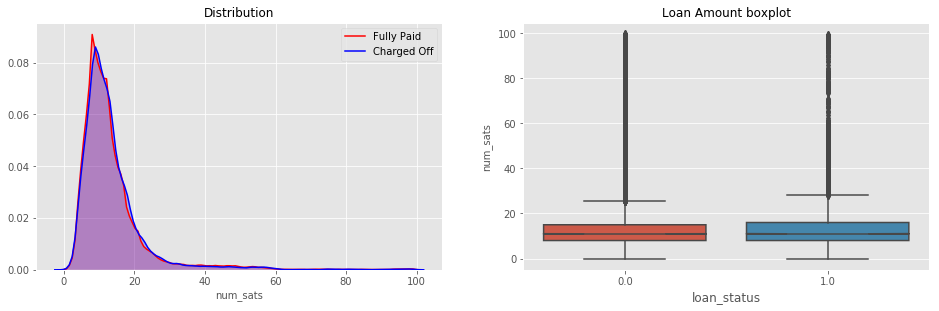

tot_hi_cred_lim


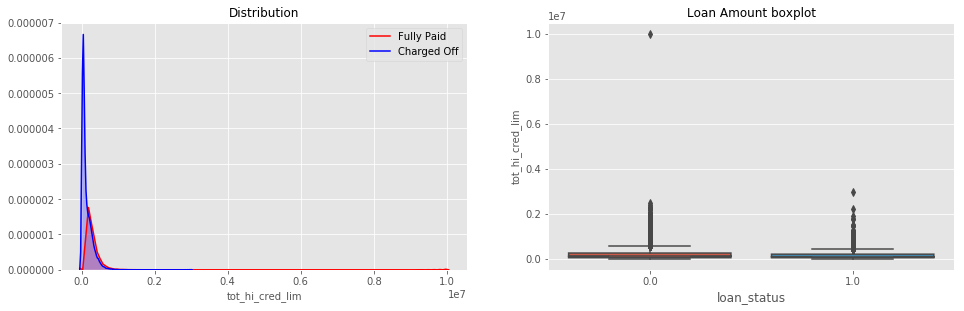

tot_coll_amt


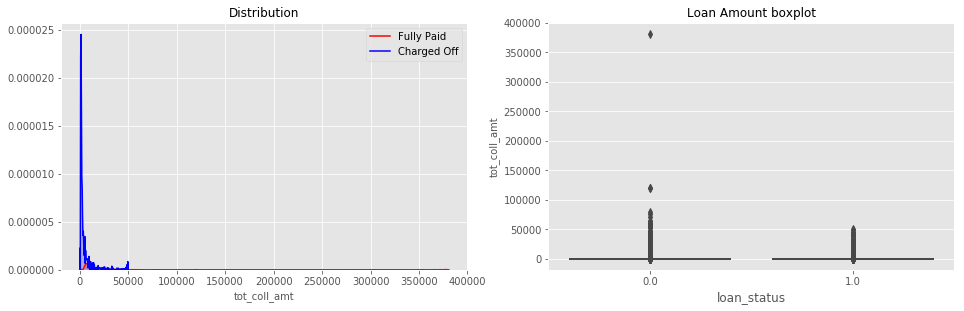

bc_open_to_buy


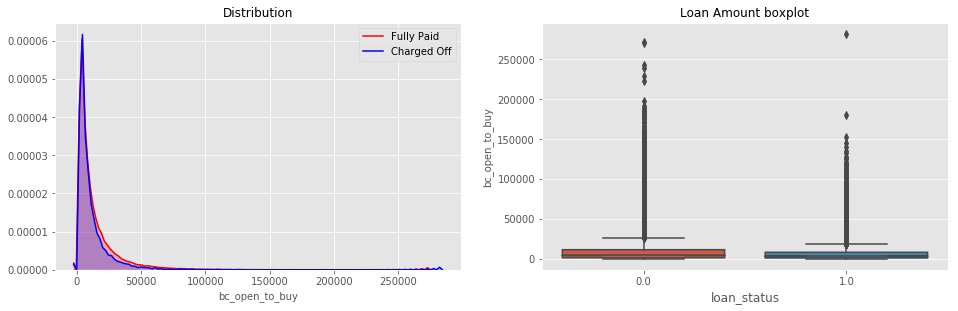

total_bc_limit


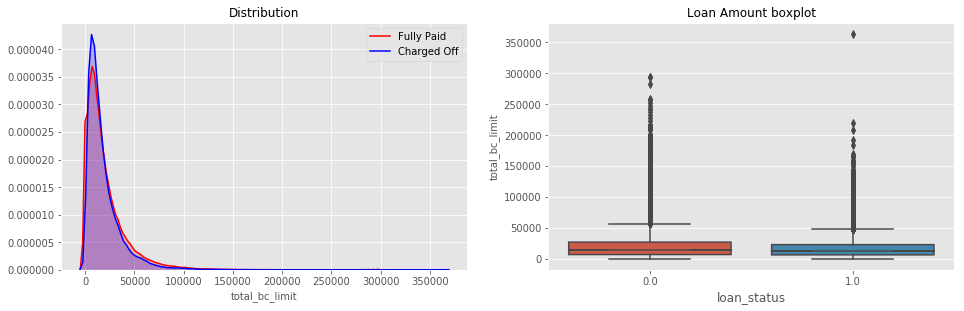

open_acc


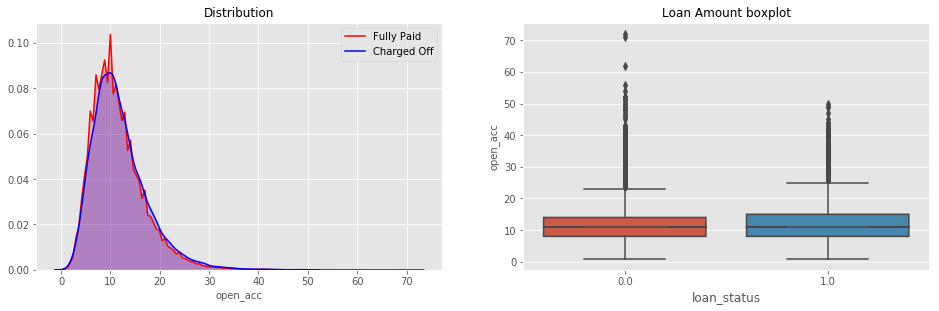

revol_util


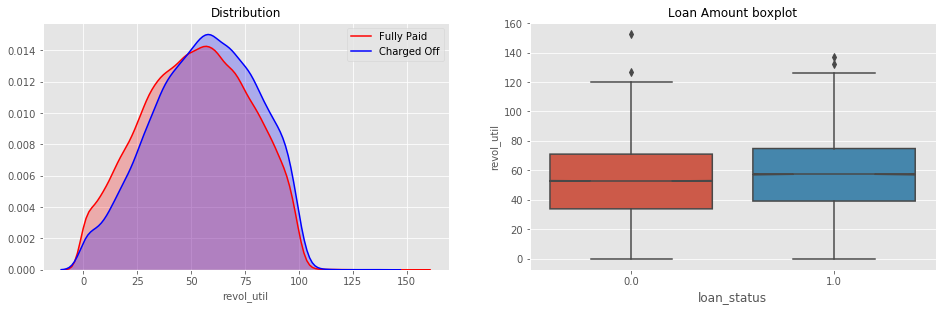

pub_rec


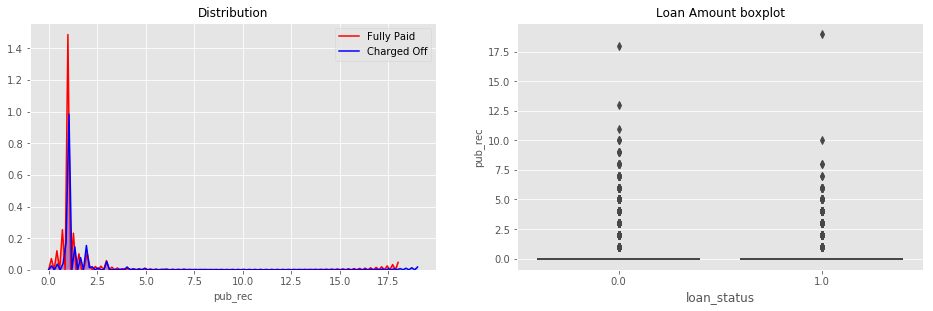

funded_amnt


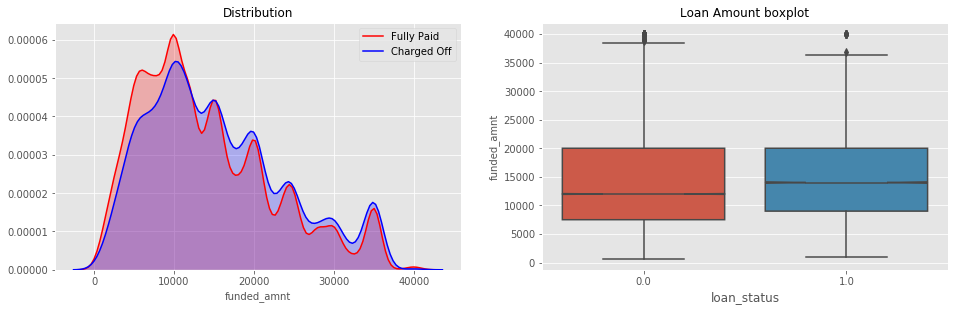

num_il_tl


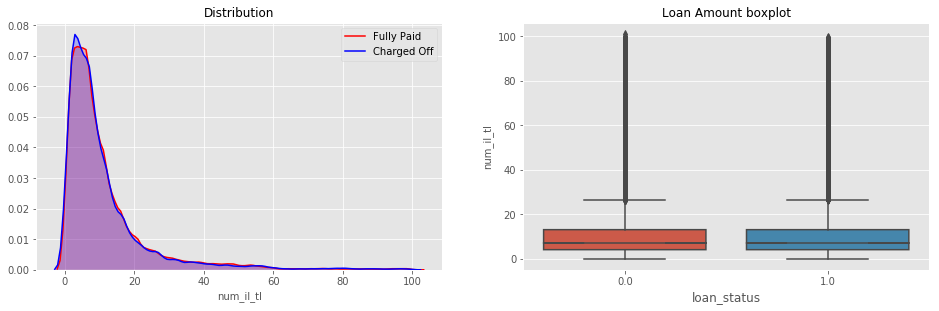

num_accts_ever_120_pd


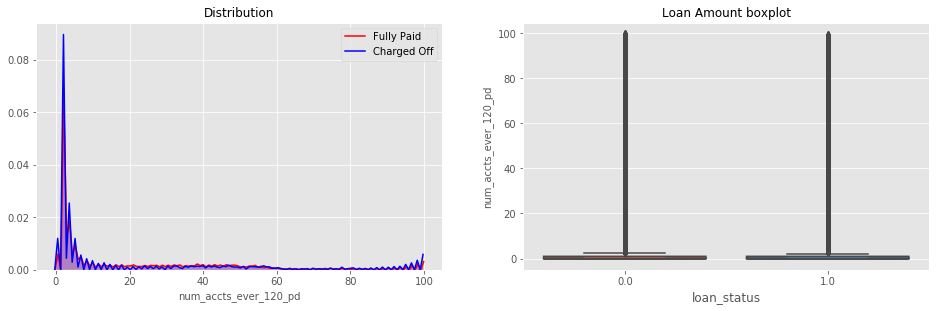

total_il_high_credit_limit


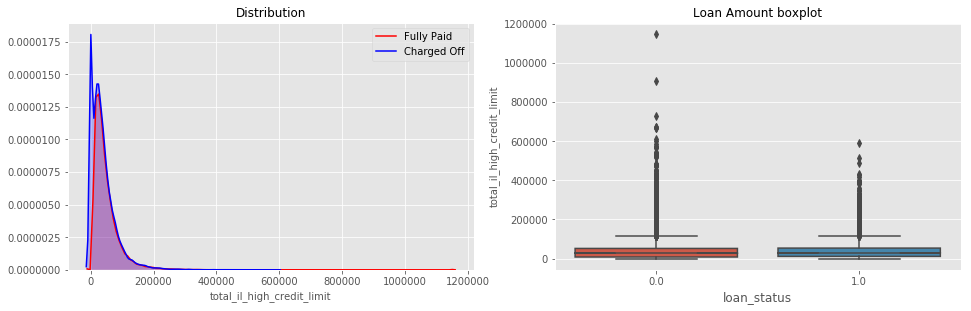

bc_util


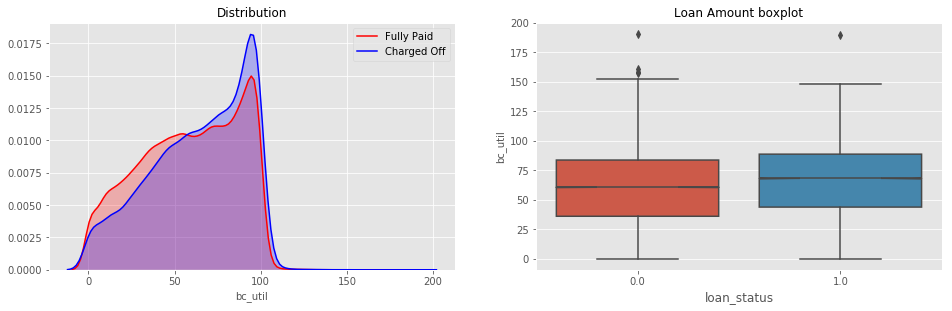

percent_bc_gt_75


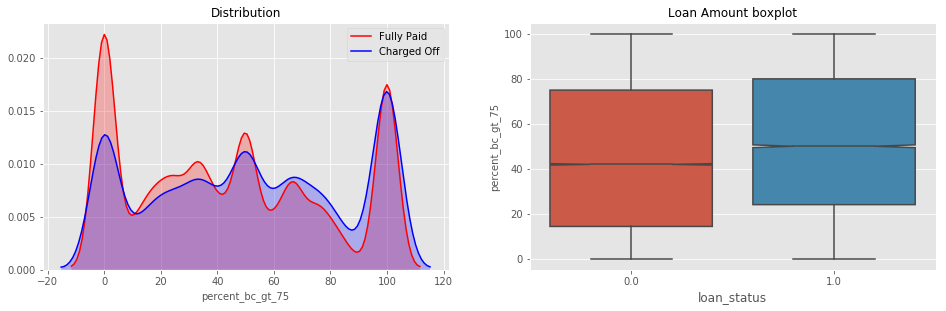

mort_acc


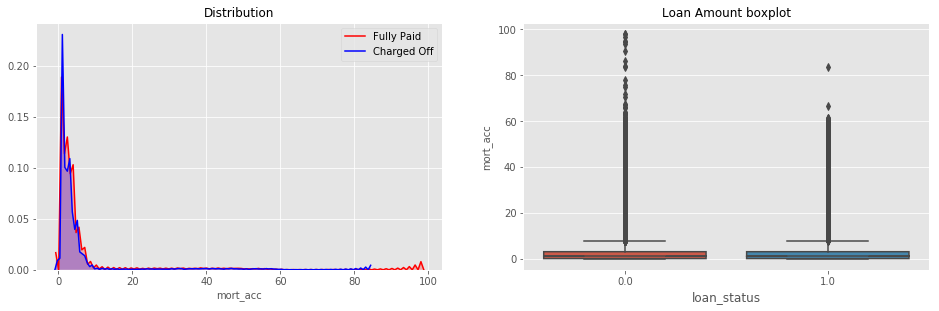

num_op_rev_tl


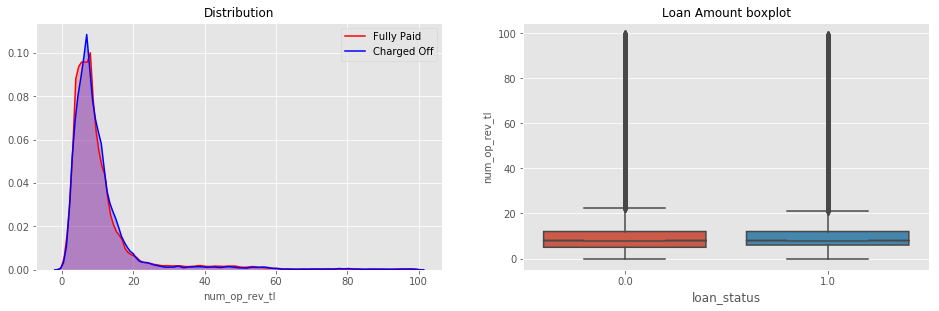

dti


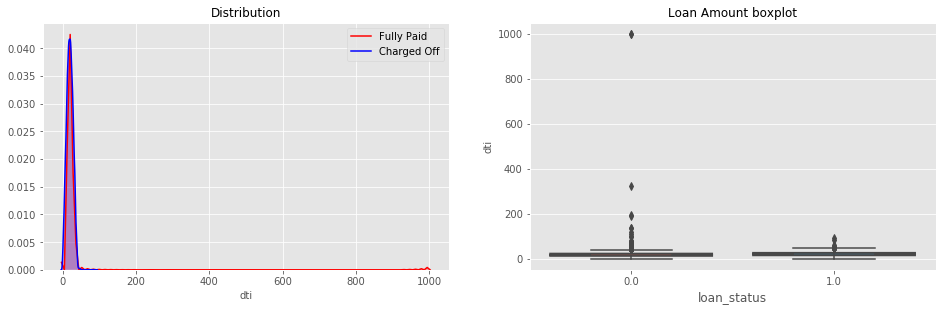

loan_status


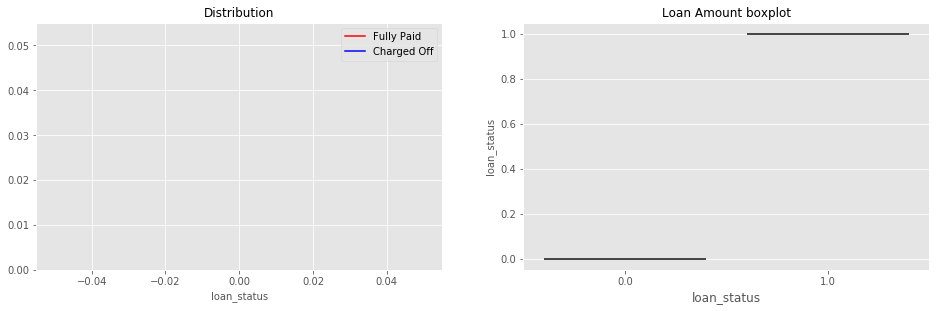

In [19]:
for variable in numeric_variables:
    print(variable)
    numerical_variables_by_target_plot(variable)


Let's remove those observations with a __z_score__ value of 3.5 or more in one numeric variable:

In [20]:
def reject_outliers(data, numeric_features, z_score = 3.5):
    
    outliers_indexes = []
    
    for col in numeric_features:
        outliers_from_col = data[scale(data[col]) > z_score].index
        
        outliers_indexes.extend(outliers_from_col)
    
    indexes_to_remove = list(set(outliers_indexes))
    indexes_to_remove_mask = data.index.isin(indexes_to_remove)
    result = data[~indexes_to_remove_mask]
    
    return result

In [21]:
loans = reject_outliers(loans, numeric_variables)

In [22]:
loans.shape

(85716, 50)

Let's plot numeric features again in order to see the difference without outliers:

num_bc_sats


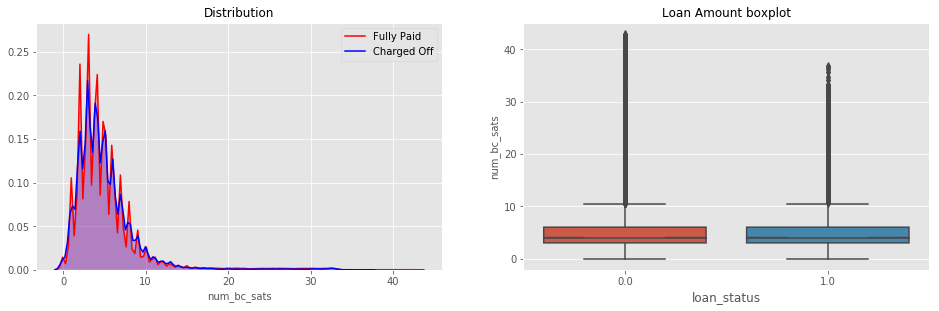

num_rev_tl_bal_gt_0


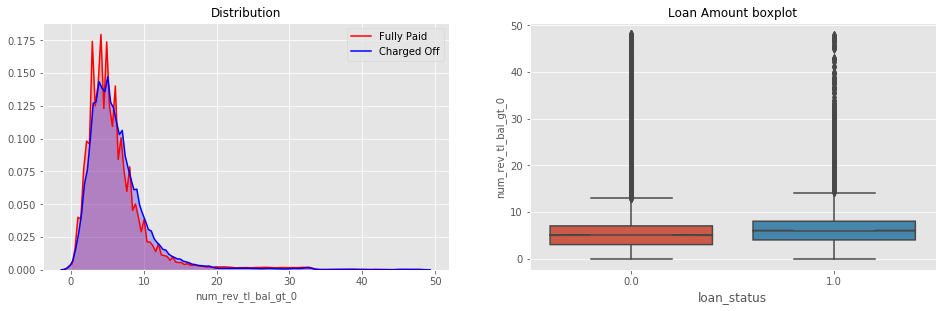

avg_cur_bal


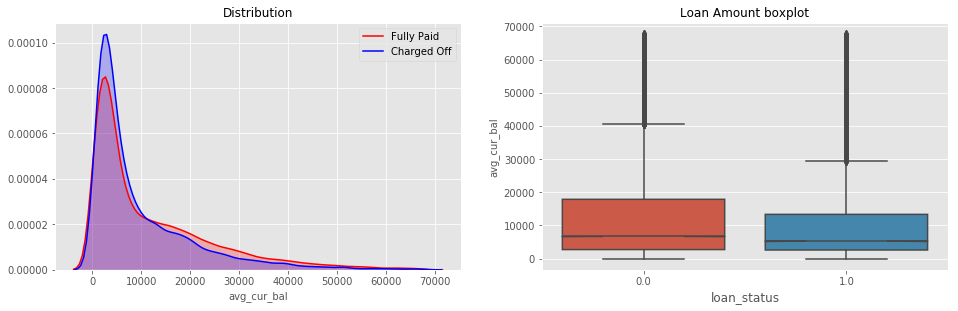

pub_rec_bankruptcies


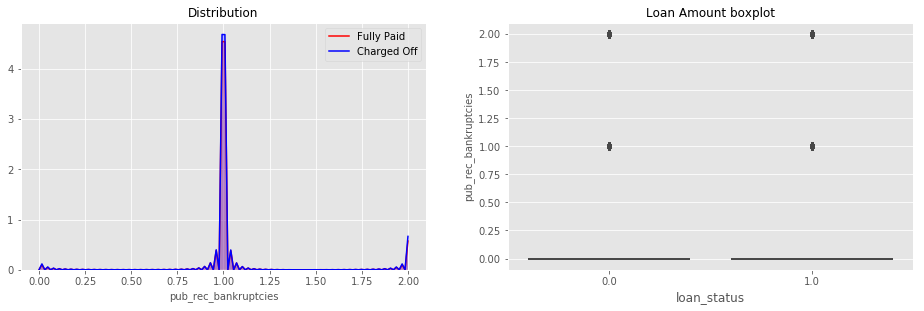

num_rev_accts


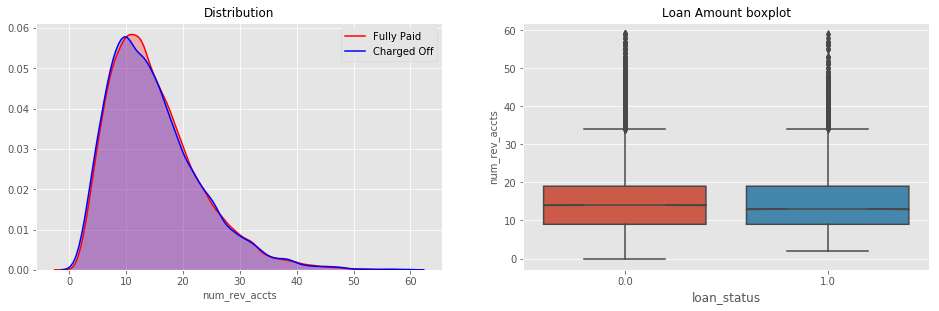

tax_liens


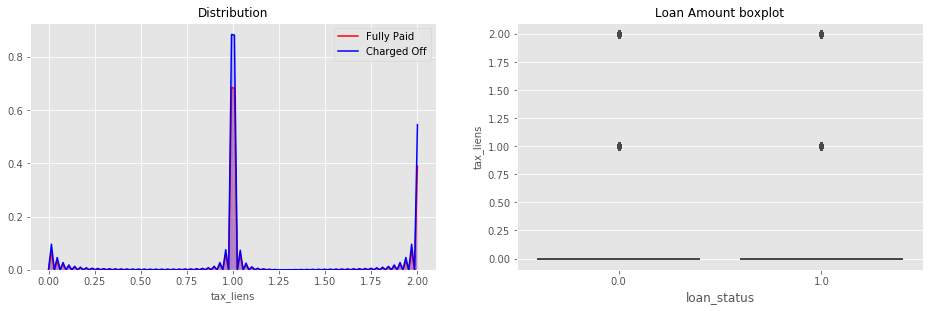

funded_amnt_inv


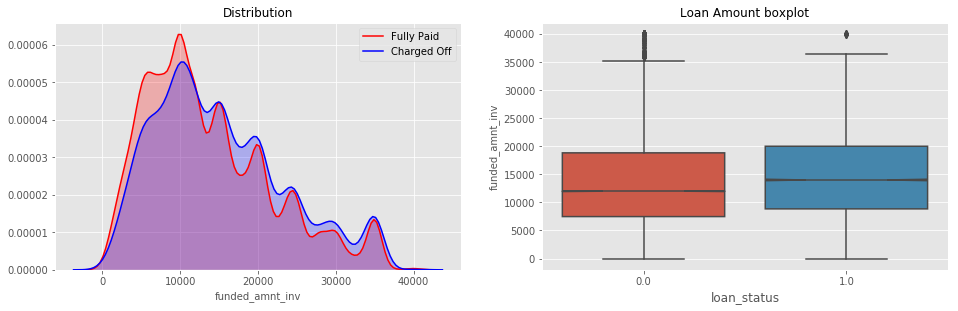

delinq_2yrs


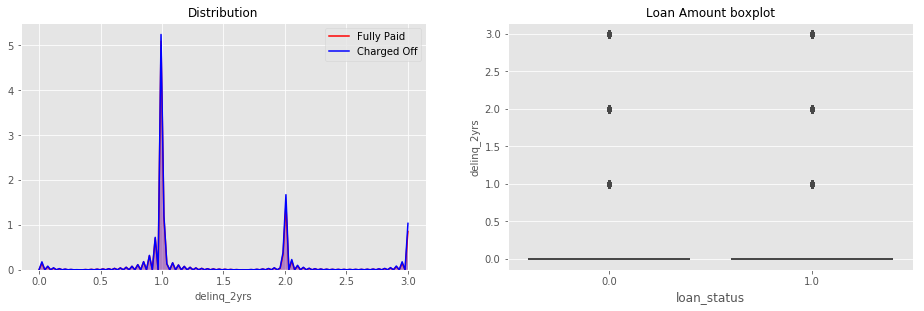

total_bal_ex_mort


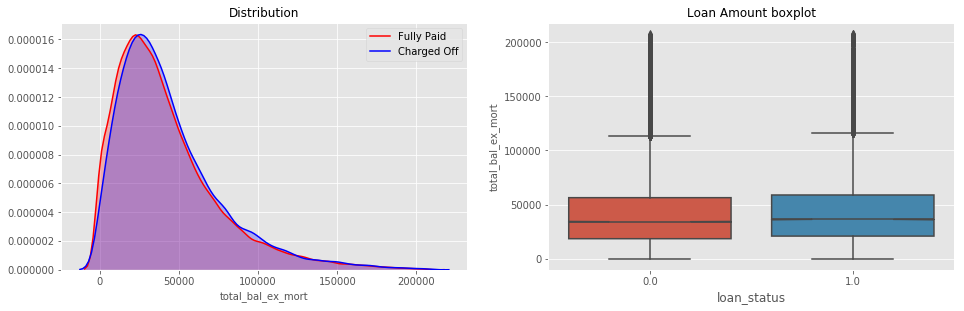

pct_tl_nvr_dlq


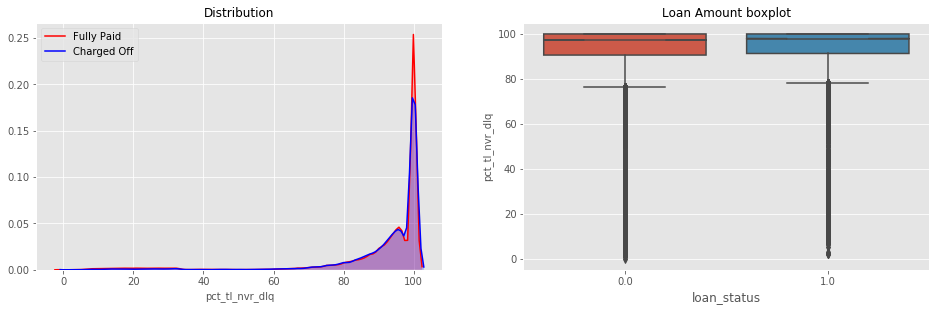

fico_range_low


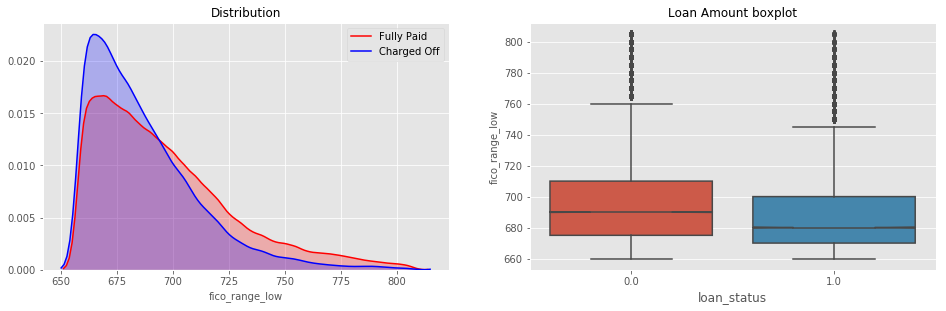

delinq_amnt


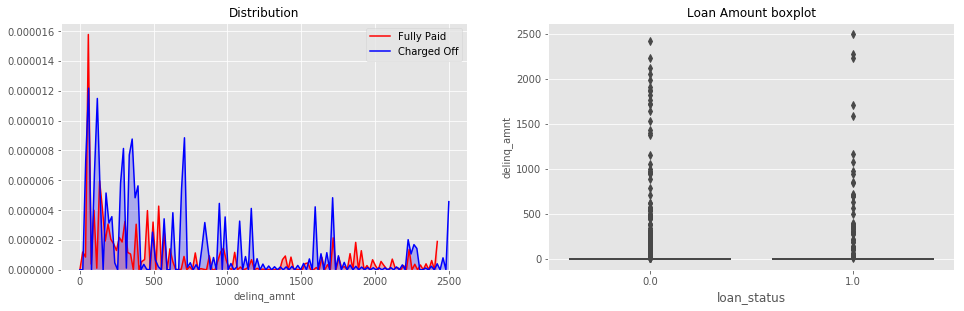

loan_amnt


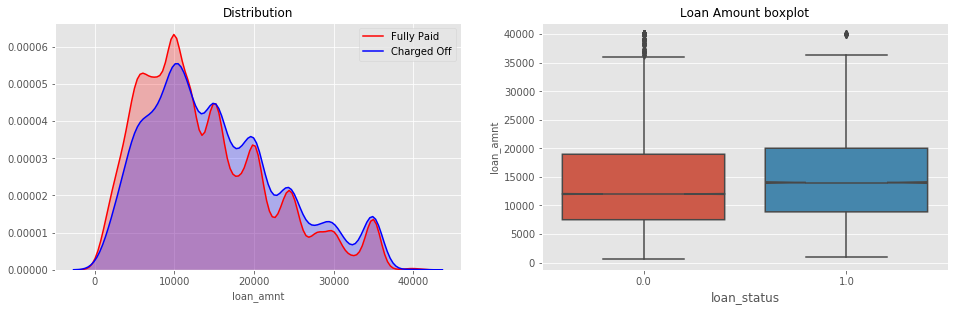

installment


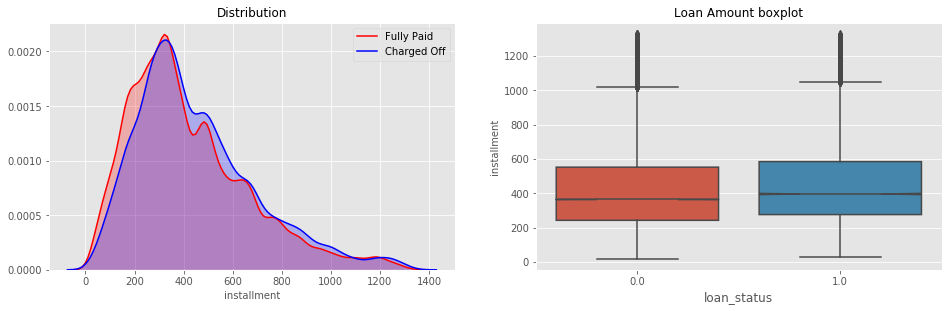

fico_range_high


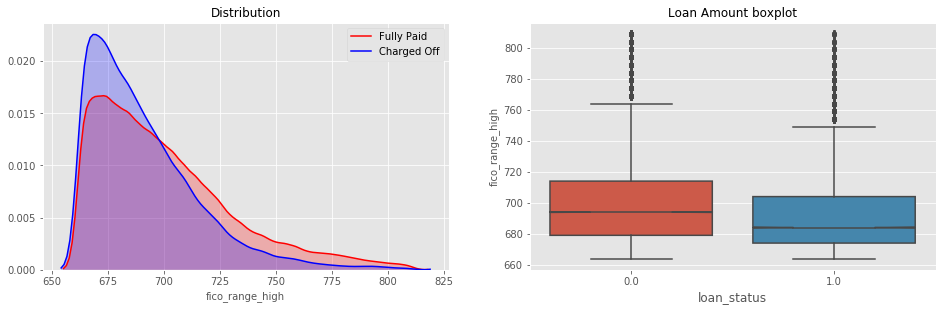

annual_inc


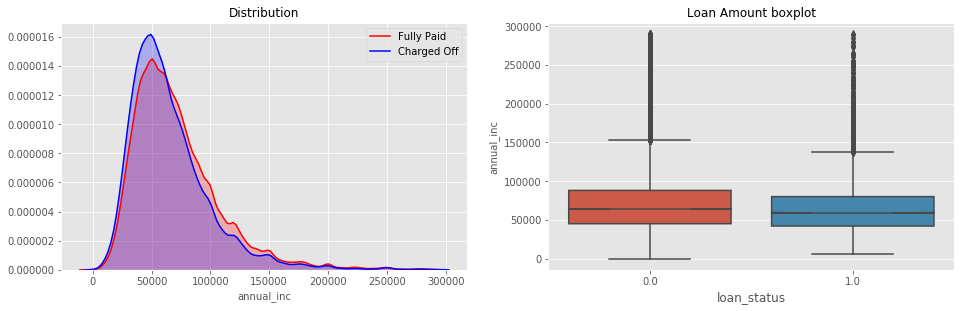

int_rate


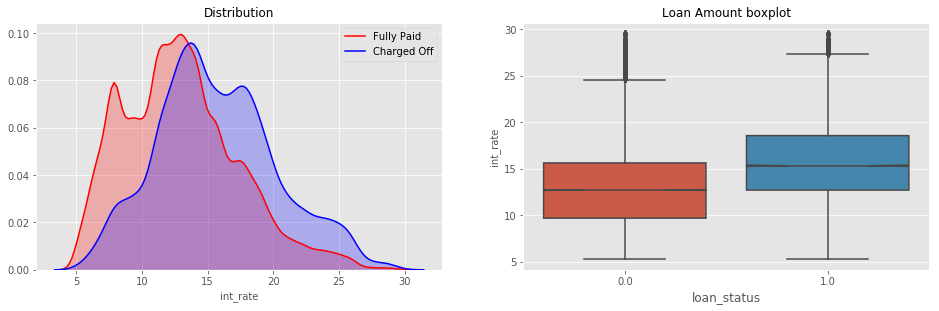

revol_bal


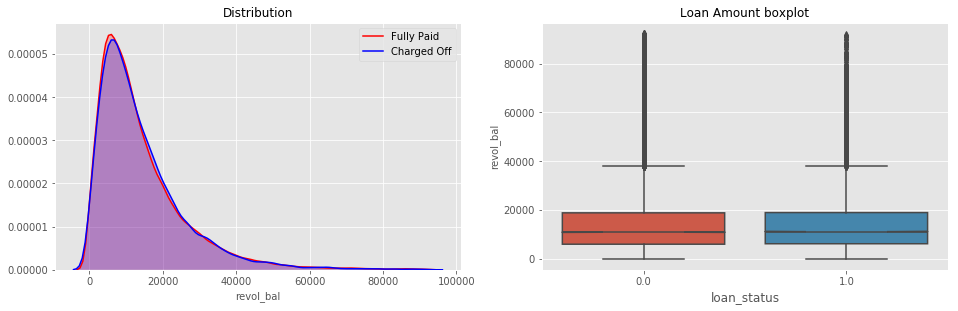

num_bc_tl


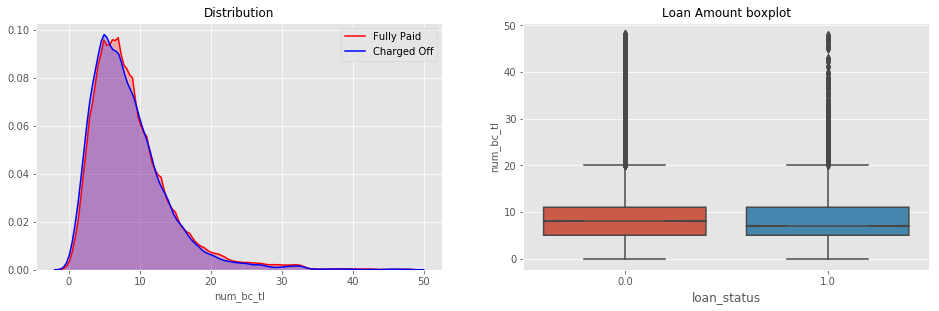

num_sats


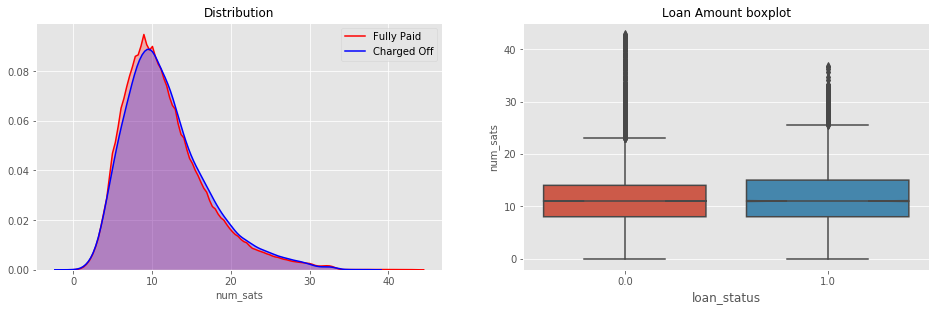

tot_hi_cred_lim


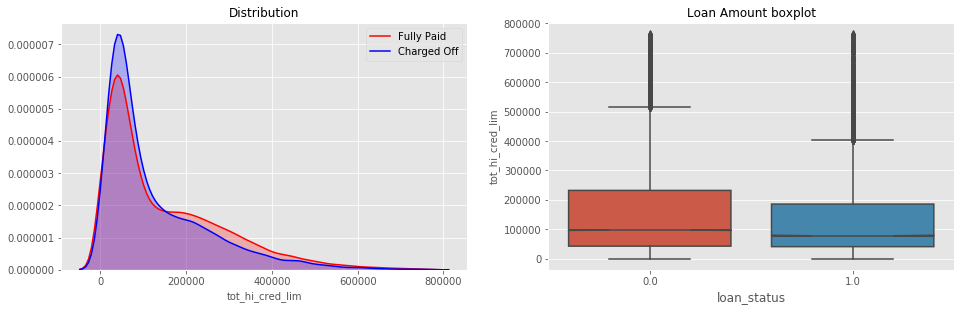

tot_coll_amt


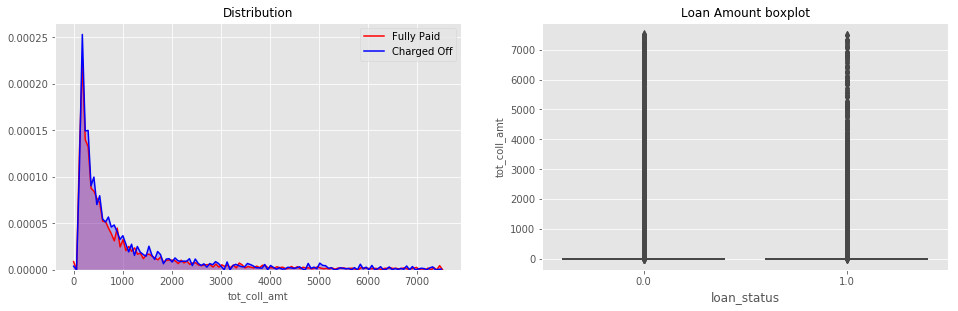

bc_open_to_buy


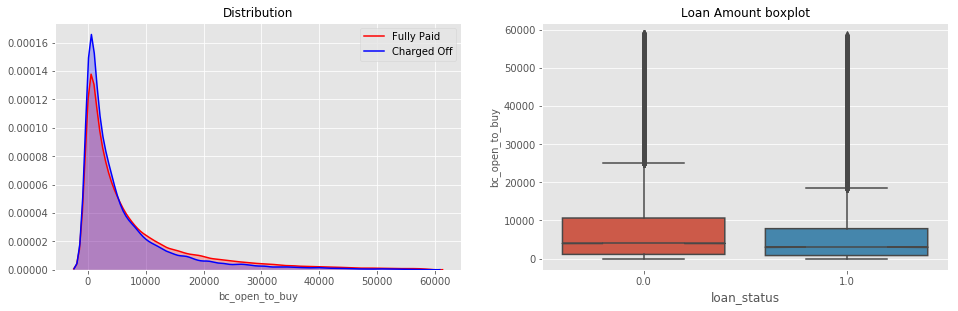

total_bc_limit


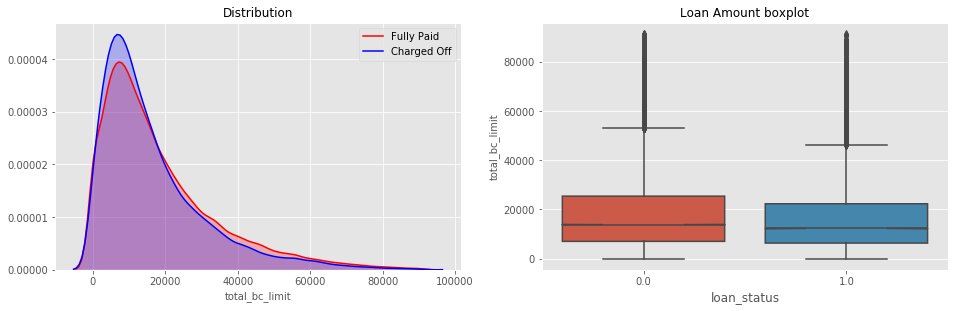

open_acc


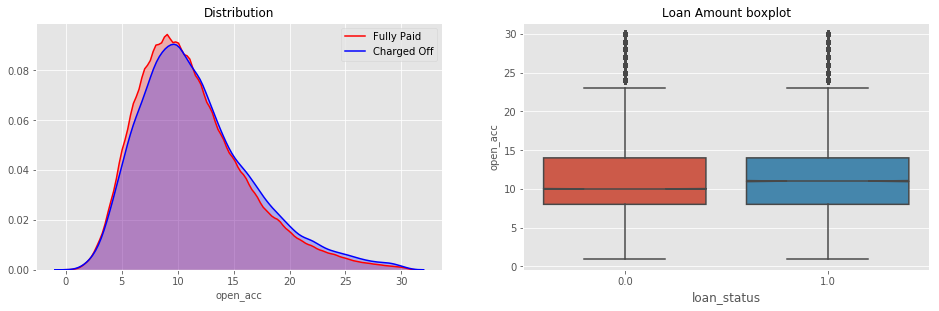

revol_util


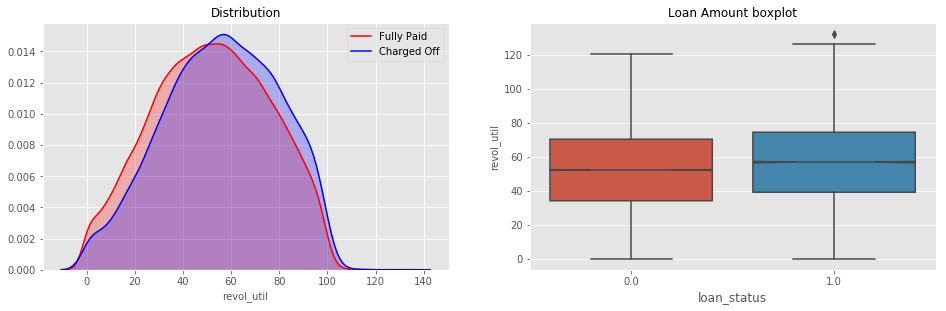

pub_rec


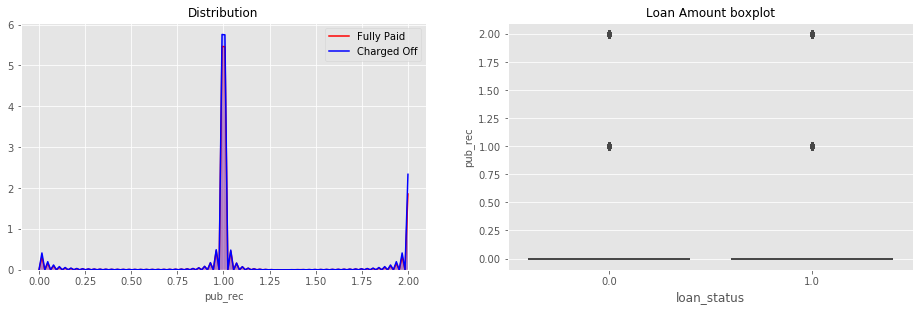

funded_amnt


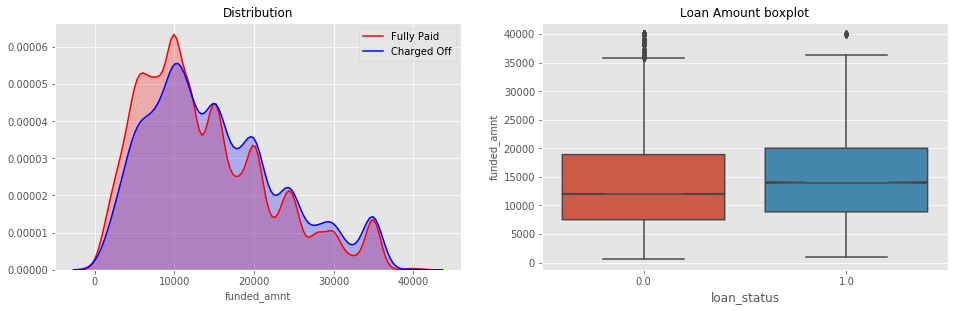

num_il_tl


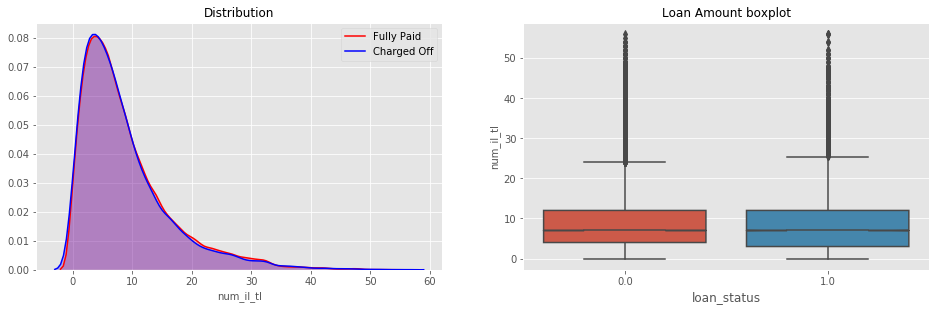

num_accts_ever_120_pd


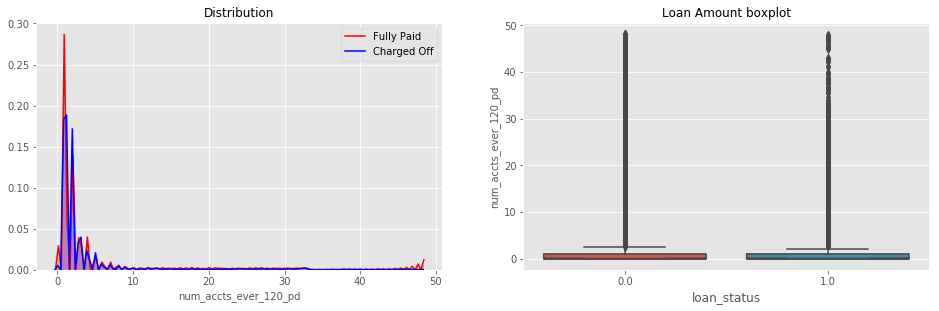

total_il_high_credit_limit


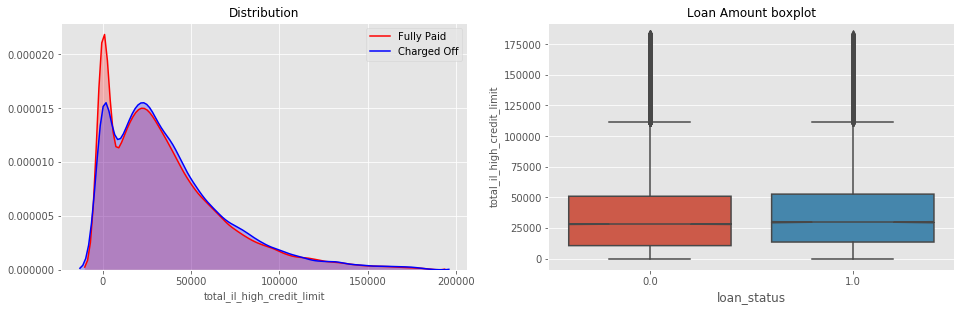

bc_util


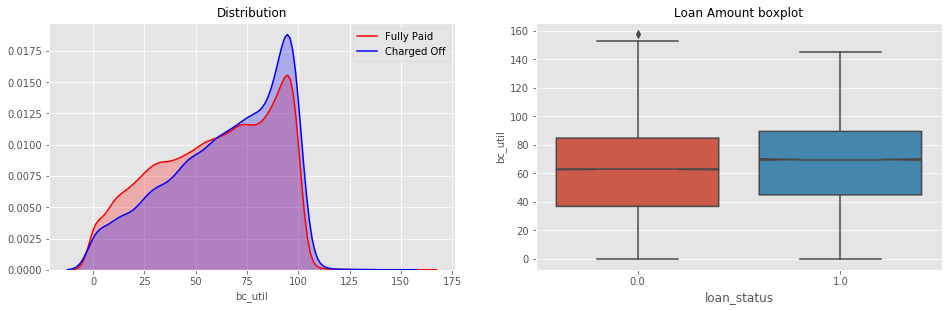

percent_bc_gt_75


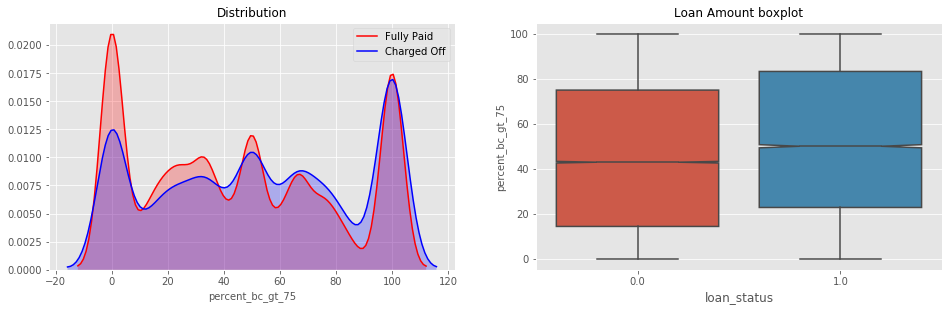

mort_acc


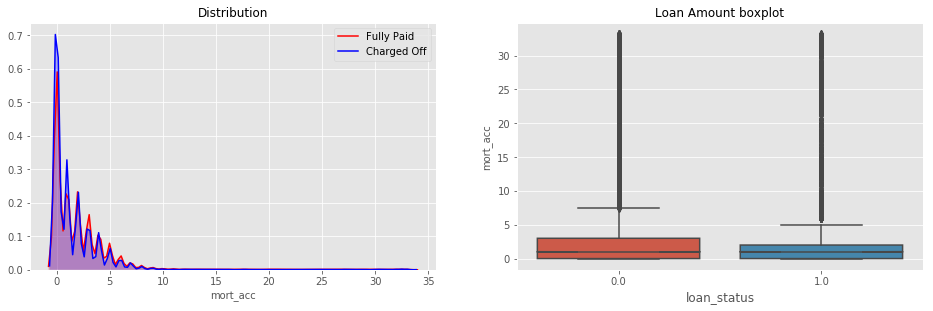

num_op_rev_tl


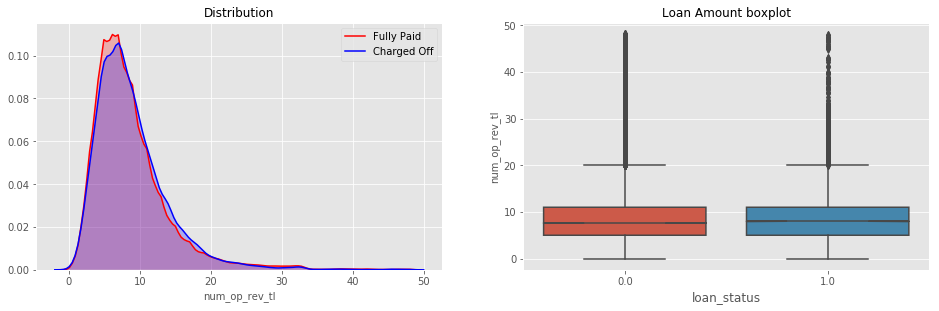

dti


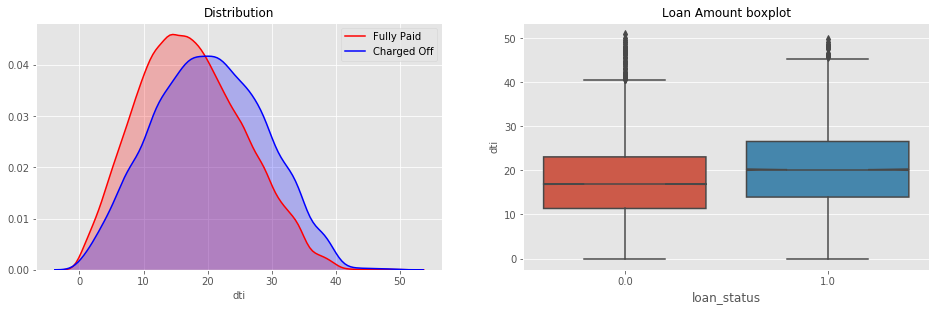

loan_status


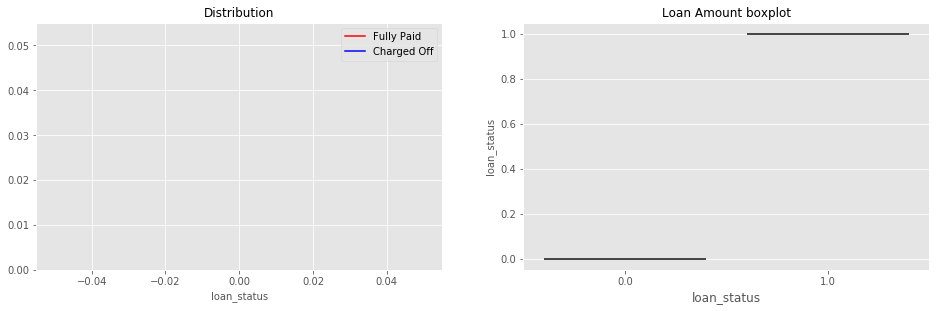

In [23]:
for variable in numeric_variables:
    print(variable)
    numerical_variables_by_target_plot(variable)

In [24]:
loans[numeric_variables].describe()

,num_bc_sats,num_rev_tl_bal_gt_0,avg_cur_bal,pub_rec_bankruptcies,num_rev_accts,tax_liens,funded_amnt_inv,delinq_2yrs,total_bal_ex_mort,pct_tl_nvr_dlq,fico_range_low,delinq_amnt,loan_amnt,installment,fico_range_high,annual_inc,int_rate,revol_bal,num_bc_tl,num_sats,tot_hi_cred_lim,tot_coll_amt,bc_open_to_buy,total_bc_limit,open_acc,revol_util,pub_rec,funded_amnt,num_il_tl,num_accts_ever_120_pd,total_il_high_credit_limit,bc_util,percent_bc_gt_75,mort_acc,num_op_rev_tl,dti,loan_status
count,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.00000,85716.000000,85716.000000
mean,5.138436,6.263448,11466.323483,0.135762,15.003881,0.027778,13954.266485,0.242802,42243.444216,91.596964,694.407170,1.039748,13981.926070,426.748243,698.407170,69901.115555,13.523126,14197.503827,8.777273,11.651094,145587.343678,117.522536,7617.169932,18042.187904,11.299092,52.720580,0.187690,13973.142412,8.890099,1.374722,35721.699084,60.455881,46.784290,2.279299,8.71684,18.015035,0.208048
std,4.245141,4.868645,12288.278220,0.358481,7.942795,0.187047,8230.188379,0.579641,33010.933642,16.620344,29.655226,35.217647,8232.853842,245.913539,29.655226,35932.758211,4.540217,12081.755333,5.666128,5.328304,136730.443511,548.552330,10007.570222,15747.994944,4.884824,23.882055,0.435255,8229.388410,7.499805,4.921920,32842.792895,28.336183,35.413239,4.117488,5.29580,8.287596,0.405913
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,700.000000,19.870000,664.000000,0.000000,5.320000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,700.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,3.000000,3.000000,2681.000000,0.000000,9.000000,0.000000,7825.000000,0.000000,18899.000000,90.900000,670.000000,0.000000,7950.000000,250.150000,674.000000,45000.000000,10.150000,5936.000000,5.000000,8.000000,41790.000000,0.000000,1008.000000,6800.000000,8.000000,35.000000,0.000000,7918.750000,4.000000,0.000000,11182.500000,38.200000,16.700000,0.000000,5.00000,11.790000,0.000000
50%,4.000000,5.000000,6296.500000,0.000000,13.352500,0.000000,12000.000000,0.000000,34532.500000,97.400000,685.000000,0.000000,12000.000000,371.110000,689.000000,62000.000000,13.110000,10861.000000,8.000000,11.000000,91680.500000,0.000000,3729.000000,13500.000000,11.000000,53.100000,0.000000,12000.000000,7.000000,0.000000,28439.500000,64.000000,50.000000,1.000000,8.00000,17.520000,0.000000
75%,6.000000,7.000000,16955.250000,0.000000,19.000000,0.000000,19500.000000,0.000000,56858.250000,100.000000,710.000000,0.000000,19600.000000,559.830000,714.000000,85500.000000,16.290000,18789.500000,11.000000,14.000000,222788.750000,0.000000,10010.250000,24800.000000,14.000000,71.100000,0.000000,19500.000000,12.000000,1.000000,51206.500000,85.600000,75.000000,3.000000,11.00000,23.850000,0.000000
max,42.950000,48.150000,67739.000000,2.000000,59.000000,2.000000,40000.000000,3.000000,207803.000000,100.000000,805.000000,2500.000000,40000.000000,1327.880000,809.000000,290000.000000,29.490000,92201.000000,48.150000,42.950000,764311.000000,7530.000000,58845.000000,91400.000000,30.000000,132.100000,2.000000,40000.000000,56.000000,48.150000,183327.000000,157.600000,100.000000,33.215000,48.15000,50.940000,1.000000


#### 02.3 - Numeric variables and target correlation

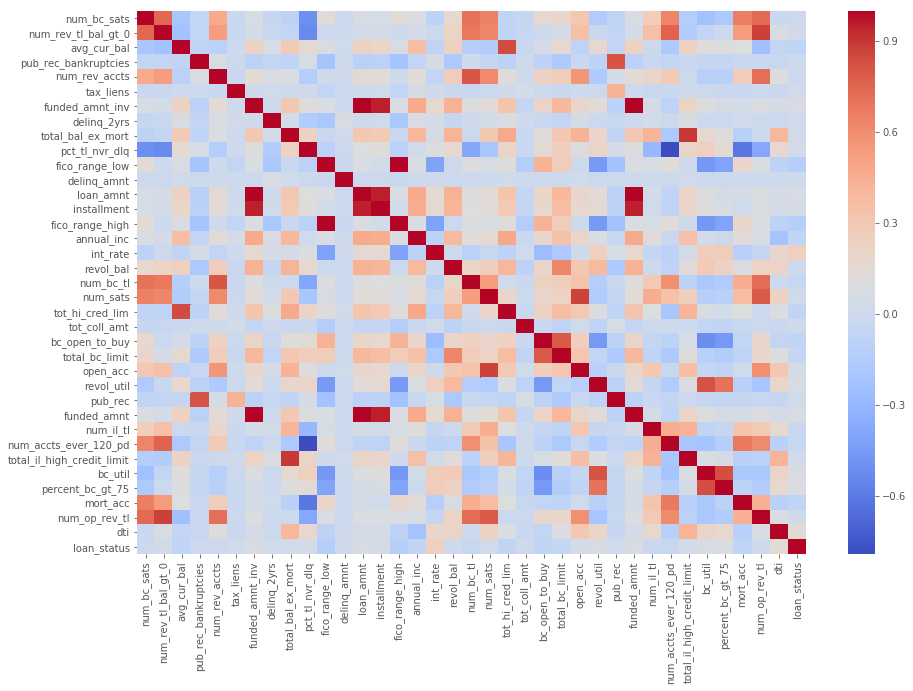

In [68]:
sns.heatmap(loans[numeric_variables].corr(),cmap="coolwarm",annot=False)

In [26]:
correlations = loans[numeric_variables].corr()['loan_status'].sort_values(ascending = False)[1:]

Text(0.5,1,"Correlation with 'loan_status'")

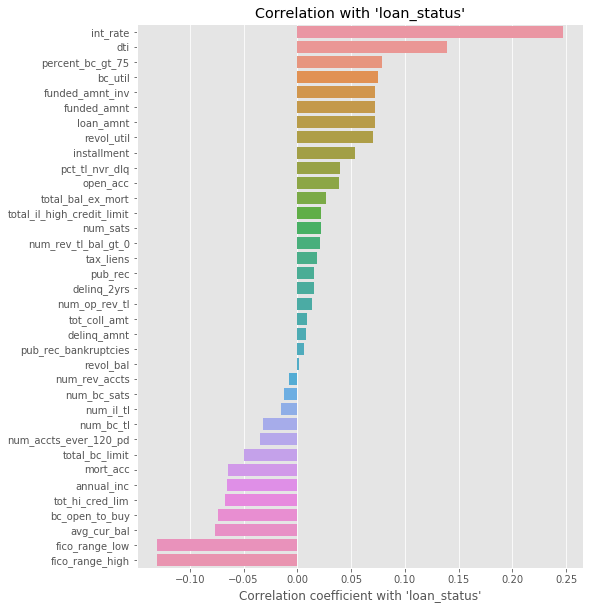

In [27]:
plt.figure(figsize=(8,10))
sns.barplot(y = correlations.index, x = correlations.values, orient = 'h')
plt.xlabel("Correlation coefficient with 'loan_status'")
plt.title("Correlation with 'loan_status'")

It seems that there is not a great correlation between the target `loan_status` and numeric variables. Only `int_rate`, `dti`, `fico_range_low` and `fico_range_high` have a correlation value greater than 0.1.

### 03 - Processing Categorical Variables

In [28]:
categorical_variables = loans.select_dtypes(include="object").columns

#### 03.1 - Filling NA's to  last valid observation

In [29]:
loans[categorical_variables].isnull().sum()

grade                     0
disbursement_method       0
verification_status       0
purpose                   0
emp_title              5155
zip_code                  0
term                      0
emp_length             4559
application_type          0
initial_list_status       0
addr_state                0
sub_grade                 0
home_ownership            0
dtype: int64

In [30]:
loans[categorical_variables] = loans[categorical_variables].fillna(method = "ffill")

In [31]:
loans[categorical_variables].isnull().sum()

grade                  0
disbursement_method    0
verification_status    0
purpose                0
emp_title              0
zip_code               0
term                   0
emp_length             0
application_type       0
initial_list_status    0
addr_state             0
sub_grade              0
home_ownership         0
dtype: int64

Done!

#### 03.2 - Processing variables with too many categories

Number of categories per variable:

In [32]:
for variable in categorical_variables:
    number_of_categories = loans[variable].unique().size
    print("{}: {} categories".format(variable, number_of_categories))

grade: 7 categories
disbursement_method: 2 categories
verification_status: 3 categories
purpose: 14 categories
emp_title: 41323 categories
zip_code: 881 categories
term: 2 categories
emp_length: 11 categories
application_type: 2 categories
initial_list_status: 2 categories
addr_state: 51 categories
sub_grade: 35 categories
home_ownership: 6 categories


There are too many categories for `emp_title` variable. Let's analyze this more in depth

In [33]:
(loans['emp_title'].value_counts() > 10).value_counts()

False    40615
True       708
Name: emp_title, dtype: int64

There are 708 employee titles with more than 10 observations and 40615 employee titles with 10 or less observations in this sample. We can consider all the employee titles with 10 or less observations as a new category called _Other_ in order to reduce the number of categories from 40205 to 709.

However, this cut-off value can be refined in the main program when the models with all the data are launched.

In [34]:
emp_title_counter = loans.groupby("emp_title")["loan_status"].agg("count").reset_index()
emp_title_counter.columns = ["emp_title", "number_of_occurrences"]

emp_title_counter.head(10)

,emp_title,number_of_occurrences
0,\tEmployee Strategies Manager,1
1,Long Ilsand College Hospital,1
2,AP Coordinator,1
3,Accounting,1
4,Best Buy,1
5,CASHIER,1
6,Carpender,1
7,Case Managerr,1
8,Contractor Cordinator,1
9,Cyber Project Manager,1


In [35]:
def parse_emp_title(emp_title, number_of_occurrences, n = 10):
    if number_of_occurrences > n:
        result = emp_title.lower().strip()
    else:
        result = "other"
    
    return [emp_title,result]

print(parse_emp_title("Data Scientist", 3))
print(parse_emp_title("Architect", 1000000))

['Data Scientist', 'other']
['Architect', 'architect']


In [36]:
emp_title_dict = emp_title_counter.apply(lambda i: parse_emp_title(i[0], i[1]), axis = 1)\
                .set_index("emp_title")
emp_title_dict = emp_title_dict["number_of_occurrences"].to_dict()

In [37]:
loans["emp_title"] = loans["emp_title"].map(lambda i: emp_title_dict[i])

In [38]:
loans["emp_title"].head(10)

759829                       other
125402                       other
542244                       other
817252        correctional officer
382084     human resources manager
1556066                      other
157850                       other
1339865                      other
614892                       other
175381              deputy sheriff
Name: emp_title, dtype: object

In [39]:
loans["emp_title"].unique().size

518

Parsing employee titles to lowercase and removing extra white spaces, some employee titles have been grouped :)

Job titles with the highest ratio of paying the loan:

In [40]:
loans.groupby("emp_title")['loan_status'].mean().sort_values(ascending=False).head()

emp_title
security guard     0.583333
lab tech           0.545455
human resources    0.518519
owner operator     0.500000
qa analyst         0.500000
Name: loan_status, dtype: float64

Job titles with the lowest ratio of paying the loan:

In [41]:
loans.groupby("emp_title")['loan_status'].mean().sort_values(ascending=False).tail()

emp_title
detention officer     0.0
senior underwriter    0.0
morgan stanley        0.0
law enforcement       0.0
process engineer      0.0
Name: loan_status, dtype: float64

#### 03.3 - Loan Status ratio per category

In [42]:
def categorical_variables_by_target_plot(categorical_variable):
    
    # Charged Off observations
    plt.figure(figsize=(15, 10))
    
    g = loans.groupby(categorical_variable)['loan_status'].mean()\
             .sort_values(ascending = True).plot(kind="barh")
    g.set_title("Proportion of Charged Off loans for {}".format(categorical_variable), fontsize=12)
    g.set_xlabel(categorical_variable, fontsize=12)
    plt.show()

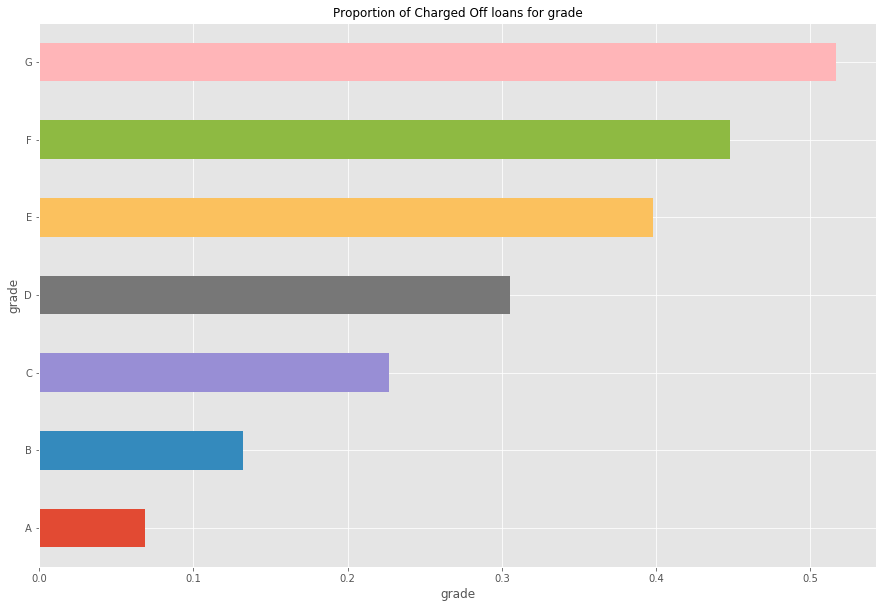

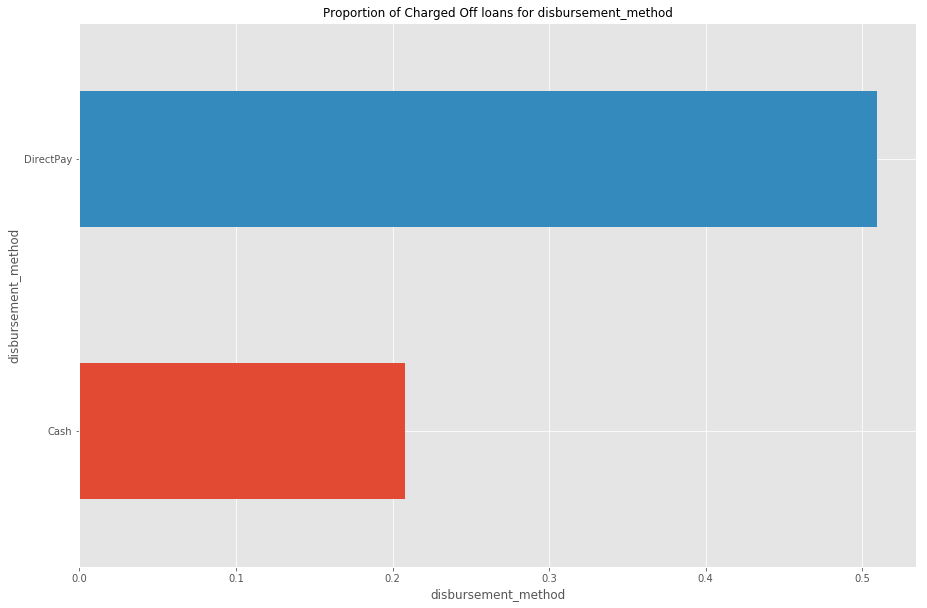

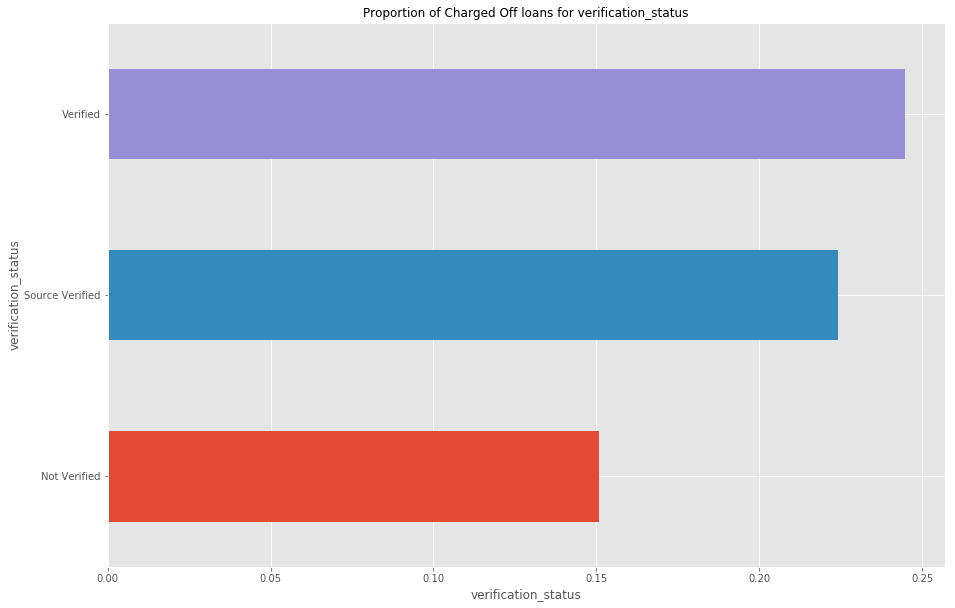

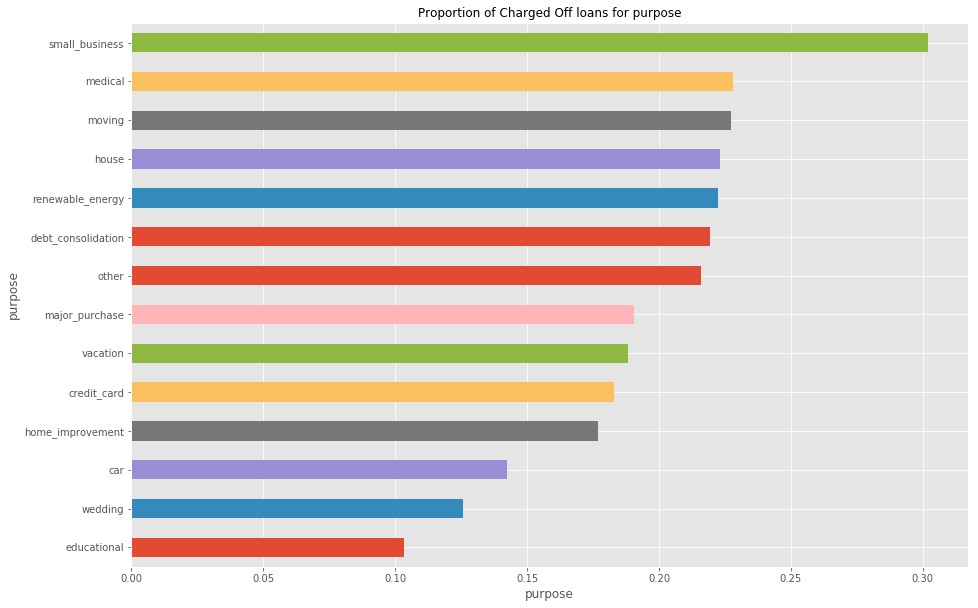

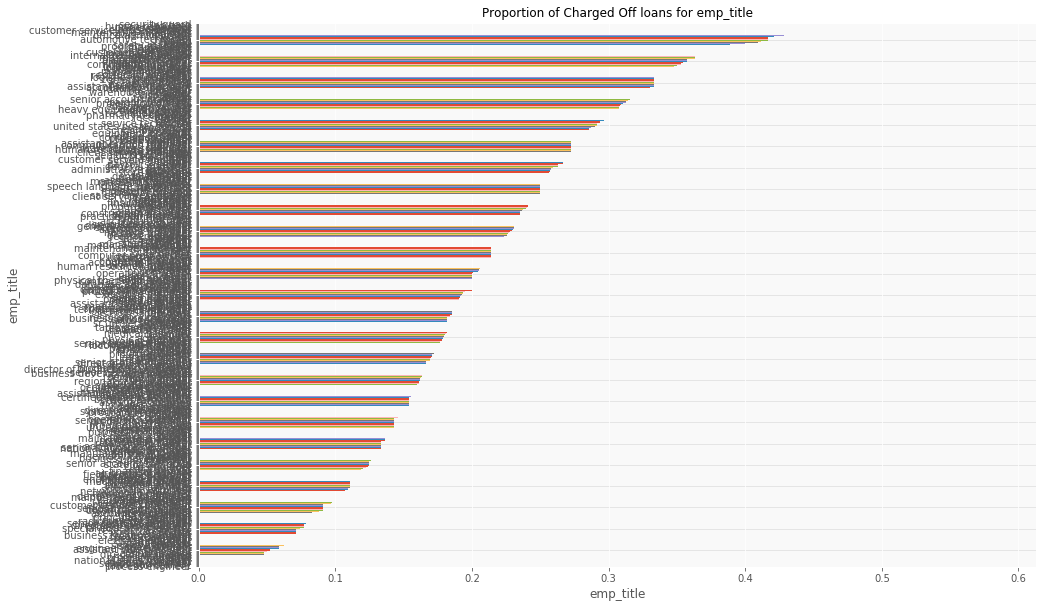

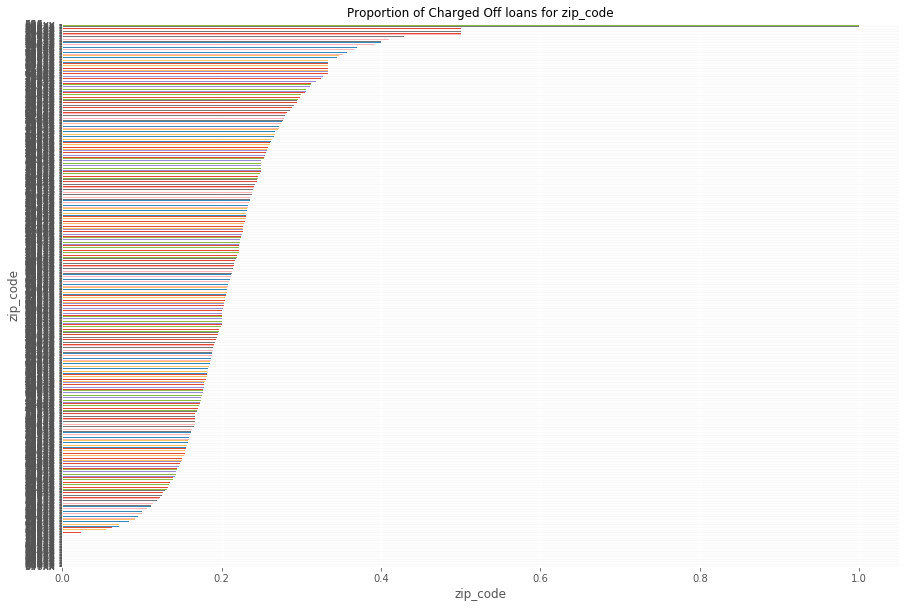

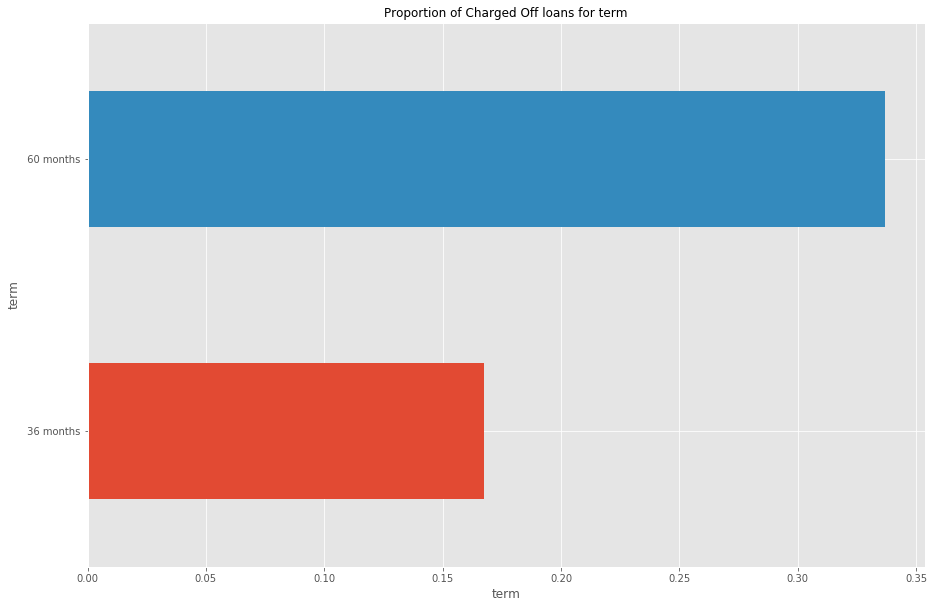

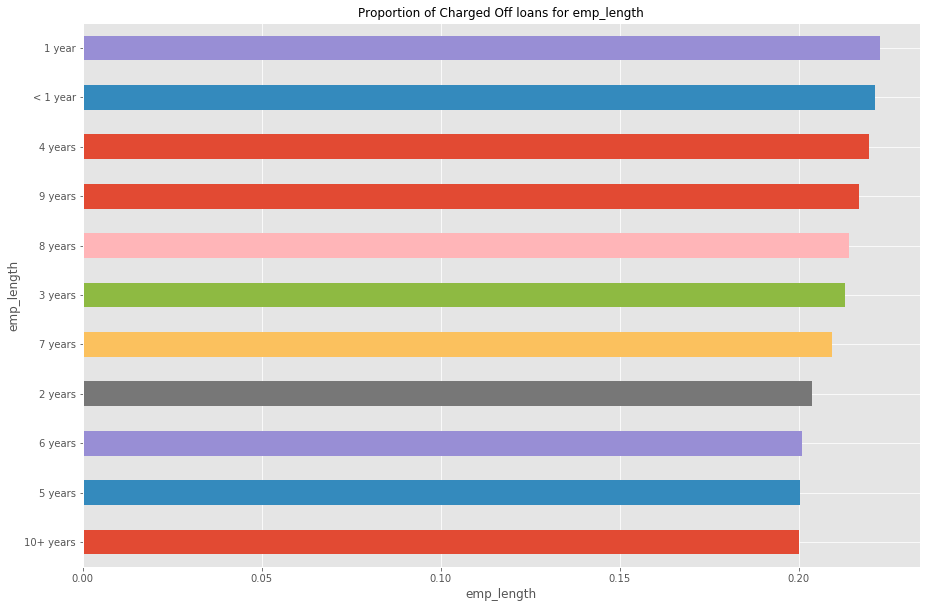

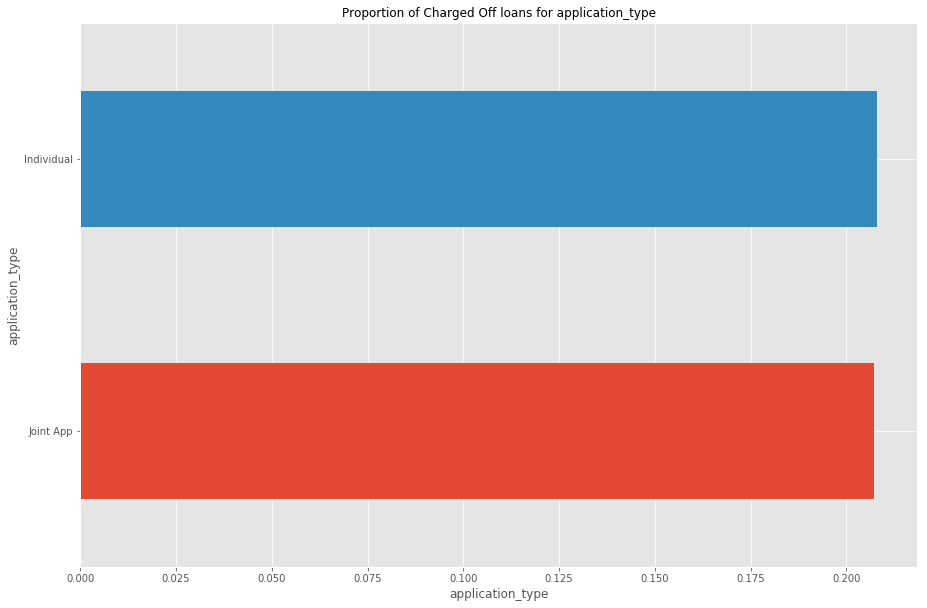

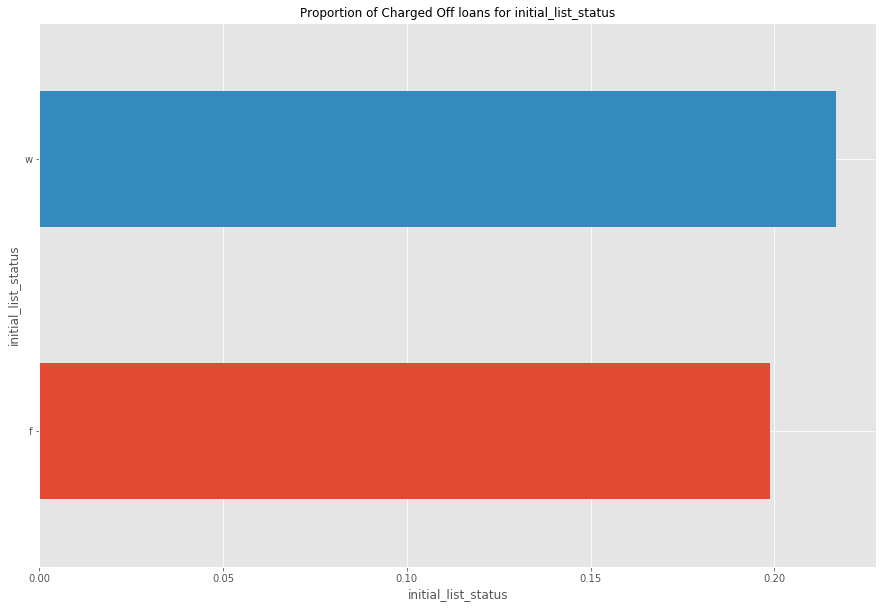

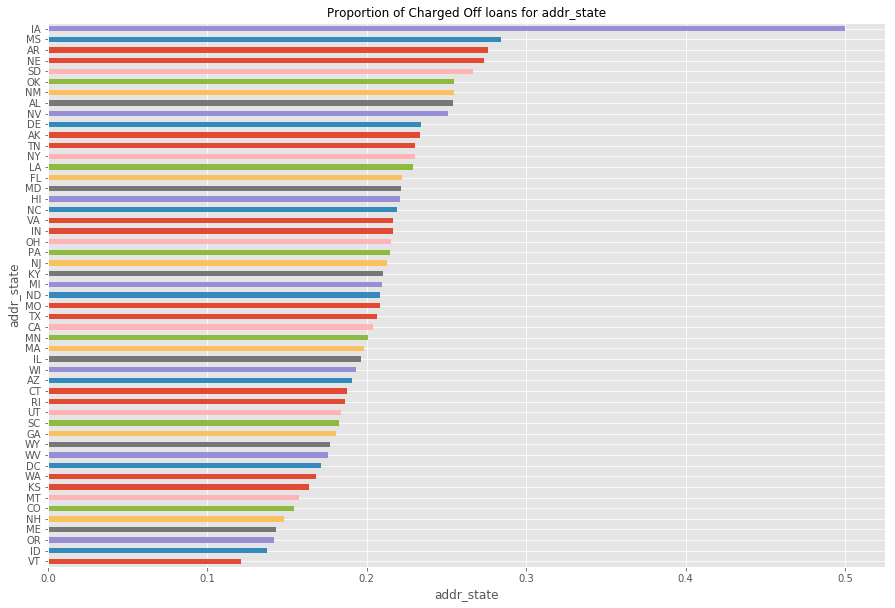

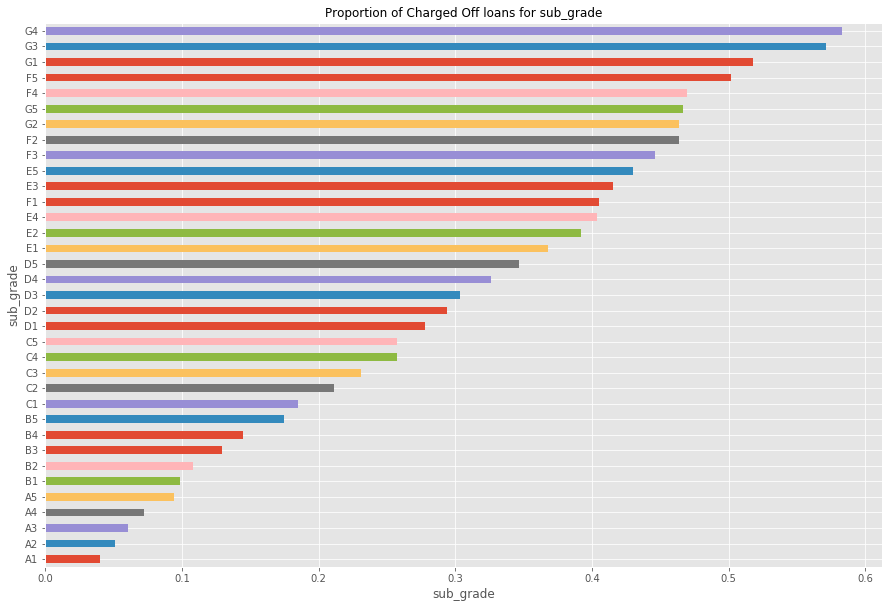

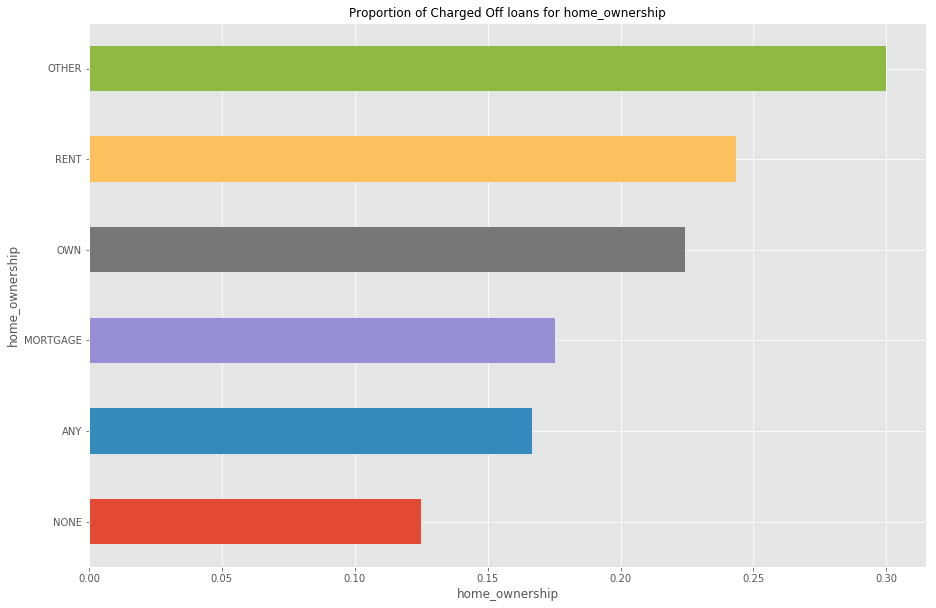

In [43]:
for variable in categorical_variables:
    categorical_variables_by_target_plot(variable)

For categorical variables we are going to try two transformations:
- Transform categoriacal variables to One Hot Encoding
- Transform each categorical variable to numeric according to the previous graphs, i.e., replacing each category with the mean of the target for each category.

#### 03.4a - Transform categorical variables to One Hot Encoding

In [44]:
loans_one_hot_encoding = loans

There are too many categories for `emp_title` and `zip_code`. Let's remove them:

In [45]:
loans_one_hot_encoding = loans_one_hot_encoding.drop(['emp_title', 'zip_code'], axis = 1)

In [46]:
categorical_variables = loans_one_hot_encoding.select_dtypes(include="object").columns

In [47]:
loans_one_hot_encoding[categorical_variables].describe()

,grade,disbursement_method,verification_status,purpose,term,emp_length,application_type,initial_list_status,addr_state,sub_grade,home_ownership
count,85716,85716,85716,85716,85716,85716,85716,85716,85716,85716,85716
unique,7,2,3,14,2,11,2,2,51,35,6
top,B,Cash,Source Verified,debt_consolidation,36 months,10+ years,Individual,w,CA,B4,MORTGAGE
freq,24998,85608,31279,51085,65247,29353,85349,43472,12780,5538,41921


In [48]:
categorical_variables = loans_one_hot_encoding.select_dtypes(include="object").columns

In [49]:
loans_one_hot_encoding = pd.get_dummies(loans_one_hot_encoding, columns = categorical_variables)

In [50]:
loans_one_hot_encoding.head()

,num_bc_sats,num_rev_tl_bal_gt_0,avg_cur_bal,pub_rec_bankruptcies,num_rev_accts,tax_liens,funded_amnt_inv,delinq_2yrs,total_bal_ex_mort,pct_tl_nvr_dlq,fico_range_low,delinq_amnt,loan_amnt,installment,fico_range_high,annual_inc,int_rate,revol_bal,num_bc_tl,num_sats,tot_hi_cred_lim,tot_coll_amt,bc_open_to_buy,total_bc_limit,open_acc,revol_util,pub_rec,funded_amnt,num_il_tl,num_accts_ever_120_pd,total_il_high_credit_limit,bc_util,percent_bc_gt_75,mort_acc,num_op_rev_tl,dti,loan_status,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,disbursement_method_Cash,disbursement_method_DirectPay,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,application_type_Individual,application_type_Joint App,initial_list_status_f,initial_list_status_w,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
759829,10.0,6.0,12413.0,0.0,21.0,0.0,20000.0,0.0,46805.0,76.0,690.0,0.0,20000.0,649.96,694.0,87000.0,10.49,25241.0,12.0,16.0,270019.0,0.0,5310.0,53100.0,16.0,41.0,0.0,20000.0,5.0,1.0,29047.0,45.0,10.0,2.0,13.0,22.21,0.0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
125402,6.0,10.0,10798.0,0.0,18.0,0.0,35000.0,0.0,70845.0,100.0,685.0,0.0,35000.0,893.35,689.0,93660.0,18.24,48500.0,7.0,15.0,196755.0,0.0,7168.0,42600.0,15.0,77.2,0.0,35000.0,10.0,0.0,36606.0,83.2,83.3,4.0,11.0,23.00,1.0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
542244,9.0,6.0,4945.0,0.0,10.0,0.0,15000.0,0.0,44504.0,100.0,710.0,0.0,15000.0,338.93,714.0,70000.0,12.69,28194.0,10.0,11.0,107207.0,0.0,42506.0,70700.0,11.0,39.9,0.0,15000.0,5.0,0.0,36507.0,39.9,28.6,0.0,9.0,20.59,0.0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [51]:
loans_one_hot_encoding.shape

(85716, 172)

#### 03.4b - Transform categorical variables to numeric

In [52]:
loans_numeric = loans

In [53]:
categorical_variables = loans_numeric.select_dtypes(include="object").columns

In [54]:
loans_numeric[categorical_variables]

,grade,disbursement_method,verification_status,purpose,emp_title,zip_code,term,emp_length,application_type,initial_list_status,addr_state,sub_grade,home_ownership
759829,B,Cash,Verified,debt_consolidation,other,800xx,36 months,10+ years,Individual,w,CO,B2,MORTGAGE
125402,D,Cash,Verified,debt_consolidation,other,187xx,60 months,10+ years,Individual,w,PA,D5,MORTGAGE
542244,C,Cash,Source Verified,credit_card,other,601xx,60 months,8 years,Individual,w,IL,C2,RENT
817252,D,Cash,Source Verified,other,correctional officer,939xx,36 months,6 years,Individual,f,CA,D2,MORTGAGE
382084,F,Cash,Verified,credit_card,human resources manager,933xx,60 months,1 year,Individual,f,CA,F1,MORTGAGE
1556066,C,Cash,Not Verified,debt_consolidation,other,906xx,60 months,8 years,Individual,w,CA,C5,RENT
157850,D,Cash,Verified,home_improvement,other,633xx,36 months,10+ years,Individual,f,MO,D2,MORTGAGE
1339865,C,Cash,Source Verified,credit_card,other,153xx,60 months,3 years,Individual,w,PA,C4,RENT
614892,C,Cash,Source Verified,debt_consolidation,other,756xx,60 months,10+ years,Individual,w,TX,C4,MORTGAGE
175381,C,Cash,Not Verified,debt_consolidation,deputy sheriff,958xx,36 months,10+ years,Individual,f,CA,C2,MORTGAGE


In [55]:
def categorical_to_numeric(variable):
    
    variable_dict = dict(loans_numeric.groupby(variable)['loan_status'].mean())
    
    result = loans_numeric[variable].map(lambda i: variable_dict[i])
    
    return result

Let's try with `grade` variable:

In [56]:
categorical_to_numeric("grade").head(15)

759829     0.132411
125402     0.305400
542244     0.226829
817252     0.305400
382084     0.447761
1556066    0.226829
157850     0.305400
1339865    0.226829
614892     0.226829
175381     0.226829
805317     0.305400
77316      0.132411
510110     0.132411
1141397    0.132411
1551305    0.068932
Name: grade, dtype: float64

In [57]:
categorical_to_numeric("grade").value_counts()

0.132411    24998
0.226829    24265
0.305400    13556
0.068932    13390
0.397785     6682
0.447761     2345
0.516667      480
Name: grade, dtype: int64

In [58]:
for variable in categorical_variables:
    loans_numeric[variable] = categorical_to_numeric(variable)

Let's take a look at the new data without categorical variables:

In [59]:
loans_numeric.head()

,num_bc_sats,num_rev_tl_bal_gt_0,grade,avg_cur_bal,pub_rec_bankruptcies,num_rev_accts,tax_liens,funded_amnt_inv,delinq_2yrs,total_bal_ex_mort,pct_tl_nvr_dlq,disbursement_method,fico_range_low,verification_status,delinq_amnt,purpose,emp_title,zip_code,loan_amnt,installment,fico_range_high,annual_inc,term,int_rate,emp_length,revol_bal,application_type,num_bc_tl,num_sats,tot_hi_cred_lim,tot_coll_amt,initial_list_status,bc_open_to_buy,total_bc_limit,open_acc,revol_util,pub_rec,funded_amnt,num_il_tl,addr_state,num_accts_ever_120_pd,total_il_high_credit_limit,bc_util,percent_bc_gt_75,sub_grade,mort_acc,num_op_rev_tl,dti,home_ownership,loan_status
759829,10.0,6.0,0.132411,12413.0,0.0,21.0,0.0,20000.0,0.0,46805.0,76.0,0.207668,690.0,0.24468,0.0,0.219399,0.200529,0.156250,20000.0,649.96,694.0,87000.0,0.167671,10.49,0.200218,25241.0,0.208052,12.0,16.0,270019.0,0.0,0.216921,5310.0,53100.0,16.0,41.0,0.0,20000.0,5.0,0.154222,1.0,29047.0,45.0,10.0,0.107770,2.0,13.0,22.21,0.175187,0.0
125402,6.0,10.0,0.305400,10798.0,0.0,18.0,0.0,35000.0,0.0,70845.0,100.0,0.207668,685.0,0.24468,0.0,0.219399,0.200529,0.187500,35000.0,893.35,689.0,93660.0,0.336753,18.24,0.200218,48500.0,0.208052,7.0,15.0,196755.0,0.0,0.216921,7168.0,42600.0,15.0,77.2,0.0,35000.0,10.0,0.214480,0.0,36606.0,83.2,83.3,0.346491,4.0,11.0,23.00,0.175187,1.0
542244,9.0,6.0,0.226829,4945.0,0.0,10.0,0.0,15000.0,0.0,44504.0,100.0,0.207668,710.0,0.22424,0.0,0.183052,0.200529,0.186158,15000.0,338.93,714.0,70000.0,0.336753,12.69,0.214123,28194.0,0.208052,10.0,11.0,107207.0,0.0,0.216921,42506.0,70700.0,11.0,39.9,0.0,15000.0,5.0,0.196368,0.0,36507.0,39.9,28.6,0.211200,0.0,9.0,20.59,0.243371,0.0
817252,6.0,9.0,0.305400,15413.0,0.0,19.0,0.0,18225.0,2.0,53889.0,92.9,0.207668,675.0,0.22424,0.0,0.215745,0.333333,0.135593,18225.0,663.92,679.0,86000.0,0.167671,18.55,0.200911,20718.0,0.208052,6.0,18.0,334811.0,0.0,0.198916,3437.0,17700.0,18.0,60.9,0.0,18225.0,8.0,0.203912,0.0,80429.0,80.6,50.0,0.293814,1.0,13.0,28.13,0.175187,0.0
382084,10.0,11.0,0.447761,1982.0,1.0,32.0,0.0,12000.0,0.0,41629.0,97.3,0.207668,665.0,0.24468,0.0,0.183052,0.208333,0.345238,12000.0,331.36,669.0,60000.0,0.336753,21.99,0.222716,11569.0,0.208052,16.0,22.0,80809.0,0.0,0.198916,14989.0,23100.0,22.0,26.5,1.0,12000.0,9.0,0.203912,1.0,37109.0,35.1,10.0,0.404830,3.0,20.0,19.14,0.175187,1.0


In [60]:
loans_numeric.shape

(85716, 50)

In [61]:
loans_numeric.describe()

,num_bc_sats,num_rev_tl_bal_gt_0,grade,avg_cur_bal,pub_rec_bankruptcies,num_rev_accts,tax_liens,funded_amnt_inv,delinq_2yrs,total_bal_ex_mort,pct_tl_nvr_dlq,disbursement_method,fico_range_low,verification_status,delinq_amnt,purpose,emp_title,zip_code,loan_amnt,installment,fico_range_high,annual_inc,term,int_rate,emp_length,revol_bal,application_type,num_bc_tl,num_sats,tot_hi_cred_lim,tot_coll_amt,initial_list_status,bc_open_to_buy,total_bc_limit,open_acc,revol_util,pub_rec,funded_amnt,num_il_tl,addr_state,num_accts_ever_120_pd,total_il_high_credit_limit,bc_util,percent_bc_gt_75,sub_grade,mort_acc,num_op_rev_tl,dti,home_ownership,loan_status
count,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.000000,85716.00000,85716.000000,85716.000000,85716.000000
mean,5.138436,6.263448,0.208048,11466.323483,0.135762,15.003881,0.027778,13954.266485,0.242802,42243.444216,91.596964,0.208048,694.407170,0.208048,1.039748,0.208048,0.208048,0.208048,13981.926070,426.748243,698.407170,69901.115555,0.208048,13.523126,0.208048,14197.503827,0.208048,8.777273,11.651094,145587.343678,117.522536,0.208048,7617.169932,18042.187904,11.299092,52.720580,0.187690,13973.142412,8.890099,0.208048,1.374722,35721.699084,60.455881,46.784290,0.208048,2.279299,8.71684,18.015035,0.208048,0.208048
std,4.245141,4.868645,0.105841,12288.278220,0.358481,7.942795,0.187047,8230.188379,0.579641,33010.933642,16.620344,0.010699,29.655226,0.039329,35.217647,0.021312,0.044690,0.050747,8232.853842,245.913539,29.655226,35932.758211,0.072089,4.540217,0.008650,12081.755333,0.000063,5.666128,5.328304,136730.443511,548.552330,0.009002,10007.570222,15747.994944,4.884824,23.882055,0.435255,8229.388410,7.499805,0.023378,4.921920,32842.792895,28.336183,35.413239,0.108878,4.117488,5.29580,8.287596,0.032649,0.405913
min,0.000000,0.000000,0.068932,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.207668,660.000000,0.150889,0.000000,0.103448,0.000000,0.000000,700.000000,19.870000,664.000000,0.000000,0.167671,5.320000,0.200218,0.000000,0.207084,0.000000,0.000000,0.000000,0.000000,0.198916,0.000000,0.000000,1.000000,0.000000,0.000000,700.000000,0.000000,0.121387,0.000000,0.000000,0.000000,0.000000,0.039980,0.000000,0.00000,0.000000,0.125000,0.000000
25%,3.000000,3.000000,0.132411,2681.000000,0.000000,9.000000,0.000000,7825.000000,0.000000,18899.000000,90.900000,0.207668,670.000000,0.150889,0.000000,0.183052,0.200529,0.179487,7950.000000,250.150000,674.000000,45000.000000,0.167671,10.150000,0.200218,5936.000000,0.208052,5.000000,8.000000,41790.000000,0.000000,0.198916,1008.000000,6800.000000,8.000000,35.000000,0.000000,7918.750000,4.000000,0.198400,0.000000,11182.500000,38.200000,16.700000,0.107770,0.000000,5.00000,11.790000,0.175187,0.000000
50%,4.000000,5.000000,0.226829,6296.500000,0.000000,13.352500,0.000000,12000.000000,0.000000,34532.500000,97.400000,0.207668,685.000000,0.224240,0.000000,0.219399,0.200529,0.204724,12000.000000,371.110000,689.000000,62000.000000,0.167671,13.110000,0.203639,10861.000000,0.208052,8.000000,11.000000,91680.500000,0.000000,0.216921,3729.000000,13500.000000,11.000000,53.100000,0.000000,12000.000000,7.000000,0.206302,0.000000,28439.500000,64.000000,50.000000,0.185059,1.000000,8.00000,17.520000,0.224279,0.000000
75%,6.000000,7.000000,0.305400,16955.250000,0.000000,19.000000,0.000000,19500.000000,0.000000,56858.250000,100.000000,0.207668,710.000000,0.244680,0.000000,0.219399,0.200529,0.232906,19600.000000,559.8

In [62]:
loans_numeric.dtypes

num_bc_sats                   float64
num_rev_tl_bal_gt_0           float64
grade                         float64
avg_cur_bal                   float64
pub_rec_bankruptcies          float64
num_rev_accts                 float64
tax_liens                     float64
funded_amnt_inv               float64
delinq_2yrs                   float64
total_bal_ex_mort             float64
pct_tl_nvr_dlq                float64
disbursement_method           float64
fico_range_low                float64
verification_status           float64
delinq_amnt                   float64
purpose                       float64
emp_title                     float64
zip_code                      float64
loan_amnt                     float64
installment                   float64
fico_range_high               float64
annual_inc                    float64
term                          float64
int_rate                      float64
emp_length                    float64
revol_bal                     float64
application_

Correlation between variables and with the target:

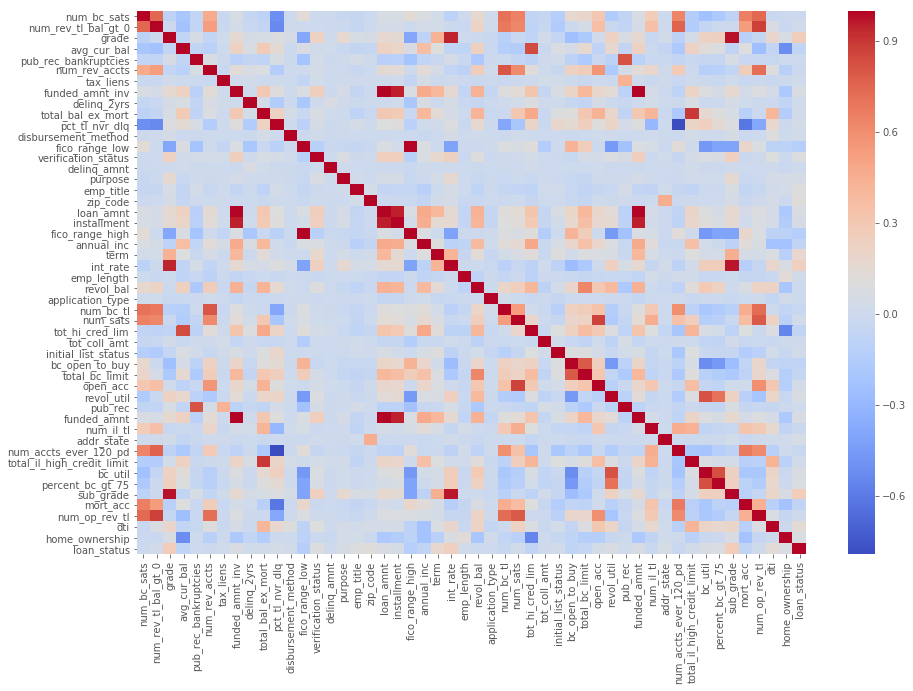

In [67]:
sns.heatmap(loans_numeric.corr(),cmap="coolwarm",annot=False)

In [64]:
correlations = loans_numeric.corr()['loan_status'].sort_values(ascending = False)[1:]

Text(0.5,1,"Correlation with 'loan_status'")

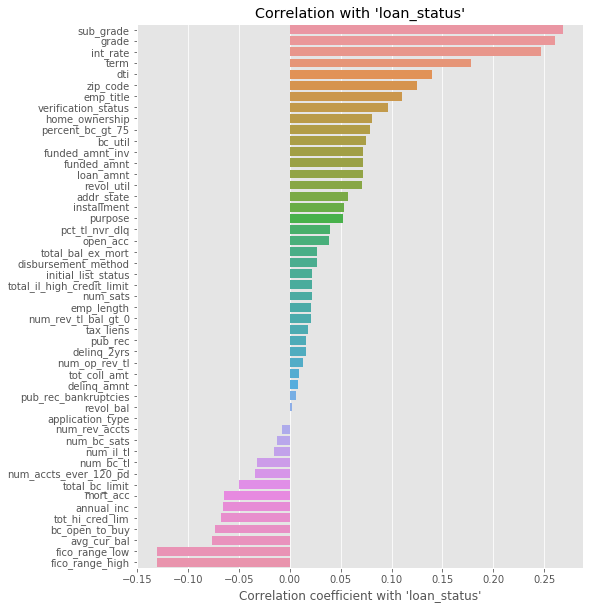

In [65]:
plt.figure(figsize=(8,10))
sns.barplot(y = correlations.index, x = correlations.values, orient = 'h')
plt.xlabel("Correlation coefficient with 'loan_status'")
plt.title("Correlation with 'loan_status'")

With this kind of transformation there are new features very correlated with the `loan_status` such as `sub_grade`, `term` and `emp_title`, what seems to be a little advance in order to predict whether a person will pay the loan or not.